# Project 3: House Price Prediction

Objective: Predict house prices based on various features like location, size, and house
characteristics.

## Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

We will open the .csv file to perform exploratory data analysis (EDA) to understand the dataset and
visualize trends.

In [25]:
df = pd.read_csv("./data/house_prices.csv")

In [26]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   Dwell_Type           1460 non-null   int64  
 2   Zone_Class           1460 non-null   object 
 3   LotFrontage          1201 non-null   float64
 4   LotArea              1460 non-null   int64  
 5   Road_Type            1460 non-null   object 
 6   Alley                91 non-null     object 
 7   Property_Shape       1460 non-null   object 
 8   LandContour          1460 non-null   object 
 9   Utilities            1460 non-null   object 
 10  LotConfig            1460 non-null   object 
 11  LandSlope            1460 non-null   object 
 12  Neighborhood         1460 non-null   object 
 13  Condition1           1460 non-null   object 
 14  Condition2           1460 non-null   object 
 15  Dwelling_Type        1460 non-null   o

In [27]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [11]:
df_nums.columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [13]:
df_objs.columns

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
df.select_dtypes(include='object')

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   Dwell_Type           1460 non-null   int64  
 2   LotFrontage          1201 non-null   float64
 3   LotArea              1460 non-null   int64  
 4   OverallQual          1460 non-null   int64  
 5   OverallCond          1460 non-null   int64  
 6   YearBuilt            1460 non-null   int64  
 7   YearRemodAdd         1460 non-null   int64  
 8   MasVnrArea           1452 non-null   float64
 9   BsmtFinSF1           1460 non-null   int64  
 10  BsmtFinSF2           1460 non-null   int64  
 11  BsmtUnfSF            1460 non-null   int64  
 12  TotalBsmtSF          1460 non-null   int64  
 13  1stFlrSF             1460 non-null   int64  
 14  2ndFlrSF             1460 non-null   int64  
 15  LowQualFinSF         1460 non-null   i

In [22]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Zone_Class      1460 non-null   object
 1   Road_Type       1460 non-null   object
 2   Alley           91 non-null     object
 3   Property_Shape  1460 non-null   object
 4   LandContour     1460 non-null   object
 5   Utilities       1460 non-null   object
 6   LotConfig       1460 non-null   object
 7   LandSlope       1460 non-null   object
 8   Neighborhood    1460 non-null   object
 9   Condition1      1460 non-null   object
 10  Condition2      1460 non-null   object
 11  Dwelling_Type   1460 non-null   object
 12  HouseStyle      1460 non-null   object
 13  RoofStyle       1460 non-null   object
 14  RoofMatl        1460 non-null   object
 15  Exterior1st     1460 non-null   object
 16  Exterior2nd     1460 non-null   object
 17  MasVnrType      588 non-null    object
 18  ExterQua

### percentage of null and nan

In [26]:
((df_nums.isnull() | df_nums.isna()).sum() * 100 / df_nums.index.size).round(2).sort_values(ascending=False)

LotFrontage            17.74
GarageYrBlt             5.55
MasVnrArea              0.55
LotArea                 0.00
Dwell_Type              0.00
Id                      0.00
OverallCond             0.00
OverallQual             0.00
YearRemodAdd            0.00
YearBuilt               0.00
BsmtFinSF2              0.00
BsmtUnfSF               0.00
TotalBsmtSF             0.00
BsmtFinSF1              0.00
2ndFlrSF                0.00
LowQualFinSF            0.00
GrLivArea               0.00
BsmtFullBath            0.00
BsmtHalfBath            0.00
FullBath                0.00
HalfBath                0.00
1stFlrSF                0.00
BedroomAbvGr            0.00
KitchenAbvGr            0.00
TotRmsAbvGrd            0.00
Fireplaces              0.00
GarageCars              0.00
GarageArea              0.00
WoodDeckSF              0.00
OpenPorchSF             0.00
EnclosedPorch           0.00
3SsnPorch               0.00
ScreenPorch             0.00
PoolArea                0.00
MiscVal       

In [27]:
((df_objs.isnull() | df_objs.isna()).sum() * 100 / df_objs.index.size).round(2).sort_values(ascending=False)

PoolQC            99.52
MiscFeature       96.30
Alley             93.77
Fence             80.75
MasVnrType        59.73
FireplaceQu       47.26
GarageFinish       5.55
GarageQual         5.55
GarageType         5.55
GarageCond         5.55
BsmtFinType2       2.60
BsmtExposure       2.60
BsmtFinType1       2.53
BsmtQual           2.53
BsmtCond           2.53
Electrical         0.07
Condition1         0.00
Condition2         0.00
Property_Shape     0.00
Road_Type          0.00
Zone_Class         0.00
Neighborhood       0.00
LandSlope          0.00
LotConfig          0.00
Utilities          0.00
LandContour        0.00
RoofStyle          0.00
Heating            0.00
ExterCond          0.00
Foundation         0.00
HouseStyle         0.00
RoofMatl           0.00
Exterior1st        0.00
Exterior2nd        0.00
ExterQual          0.00
Dwelling_Type      0.00
HeatingQC          0.00
CentralAir         0.00
KitchenQual        0.00
Functional         0.00
PavedDrive         0.00
SaleType        

In [30]:
df_nums.corr()['Property_Sale_Price'].sort_values(ascending=False)

Property_Sale_Price    1.000000
OverallQual            0.790982
GrLivArea              0.708624
GarageCars             0.640409
GarageArea             0.623431
TotalBsmtSF            0.613581
1stFlrSF               0.605852
FullBath               0.560664
TotRmsAbvGrd           0.533723
YearBuilt              0.522897
YearRemodAdd           0.507101
GarageYrBlt            0.486362
MasVnrArea             0.477493
Fireplaces             0.466929
BsmtFinSF1             0.386420
LotFrontage            0.351799
WoodDeckSF             0.324413
2ndFlrSF               0.319334
OpenPorchSF            0.315856
HalfBath               0.284108
LotArea                0.263843
BsmtFullBath           0.227122
BsmtUnfSF              0.214479
BedroomAbvGr           0.168213
ScreenPorch            0.111447
PoolArea               0.092404
MoSold                 0.046432
3SsnPorch              0.044584
BsmtFinSF2            -0.011378
BsmtHalfBath          -0.016844
MiscVal               -0.021190
Id      

In [31]:
df_nums.corr()['Property_Sale_Price'].sort_values()

KitchenAbvGr          -0.135907
EnclosedPorch         -0.128578
Dwell_Type            -0.084284
OverallCond           -0.077856
YrSold                -0.028923
LowQualFinSF          -0.025606
Id                    -0.021917
MiscVal               -0.021190
BsmtHalfBath          -0.016844
BsmtFinSF2            -0.011378
3SsnPorch              0.044584
MoSold                 0.046432
PoolArea               0.092404
ScreenPorch            0.111447
BedroomAbvGr           0.168213
BsmtUnfSF              0.214479
BsmtFullBath           0.227122
LotArea                0.263843
HalfBath               0.284108
OpenPorchSF            0.315856
2ndFlrSF               0.319334
WoodDeckSF             0.324413
LotFrontage            0.351799
BsmtFinSF1             0.386420
Fireplaces             0.466929
MasVnrArea             0.477493
GarageYrBlt            0.486362
YearRemodAdd           0.507101
YearBuilt              0.522897
TotRmsAbvGrd           0.533723
FullBath               0.560664
1stFlrSF

<Axes: xlabel='Property_Sale_Price', ylabel='Density'>

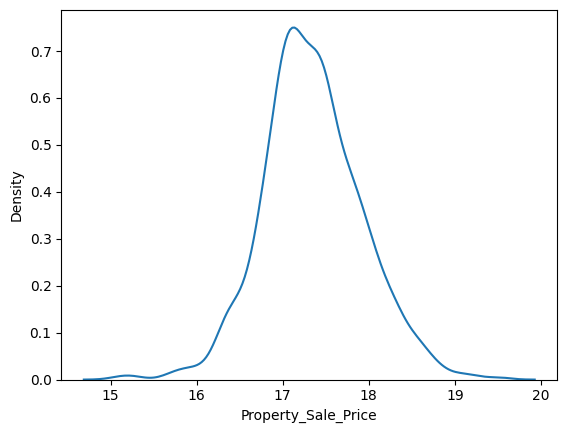

In [29]:
#Distribution of Property_Sale_Price
sns.kdeplot(np.log2(df['Property_Sale_Price']))

/tmp/ipykernel_9654/2926953514.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,3))


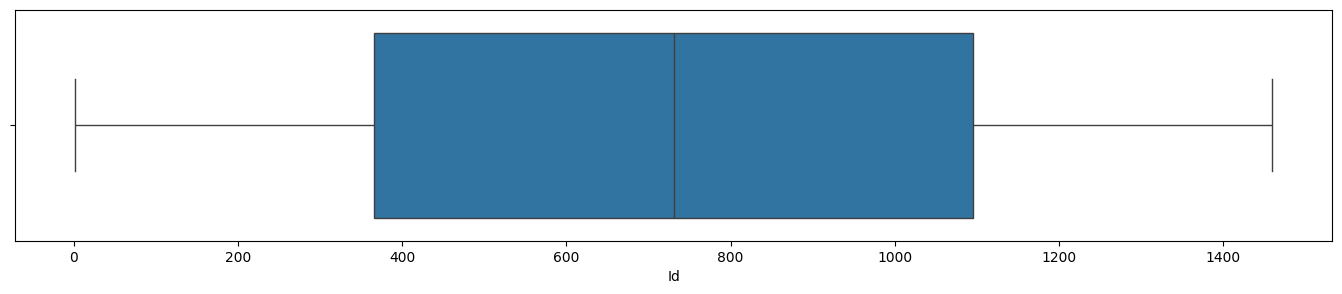

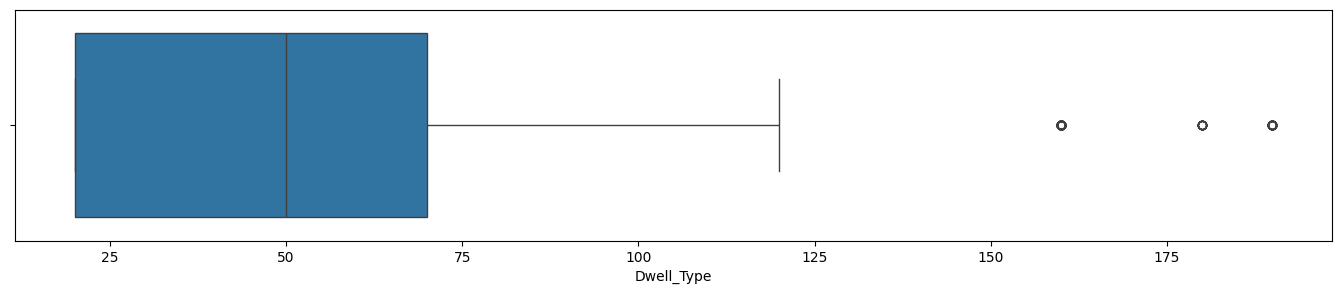

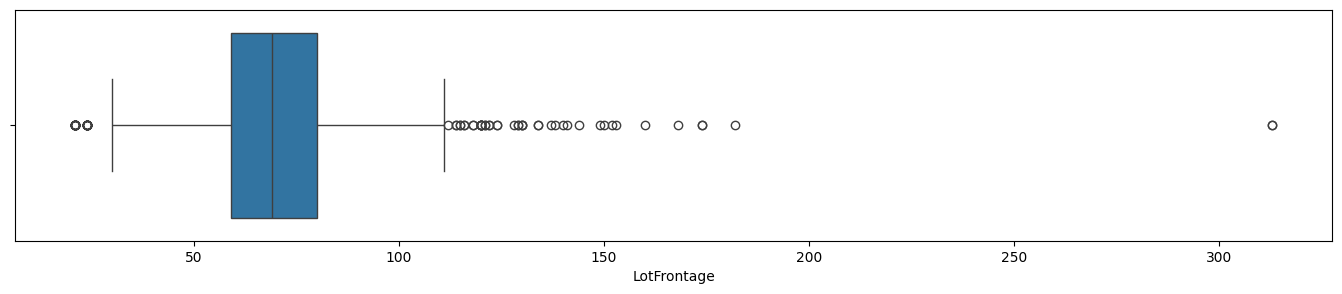

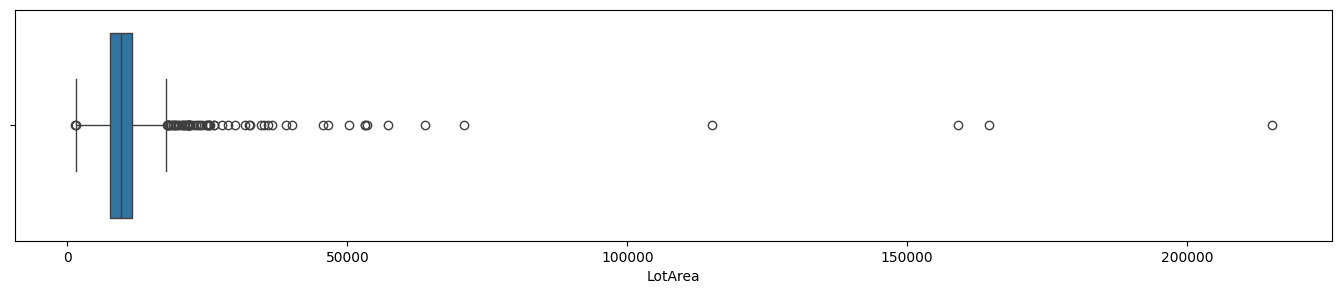

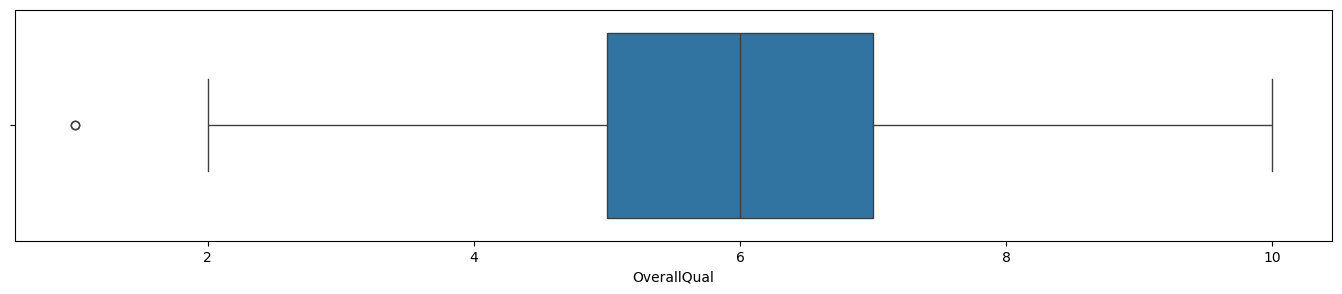

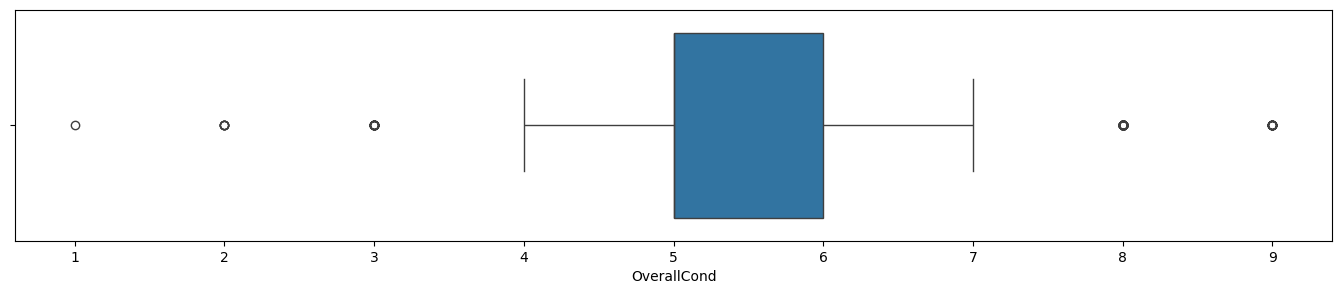

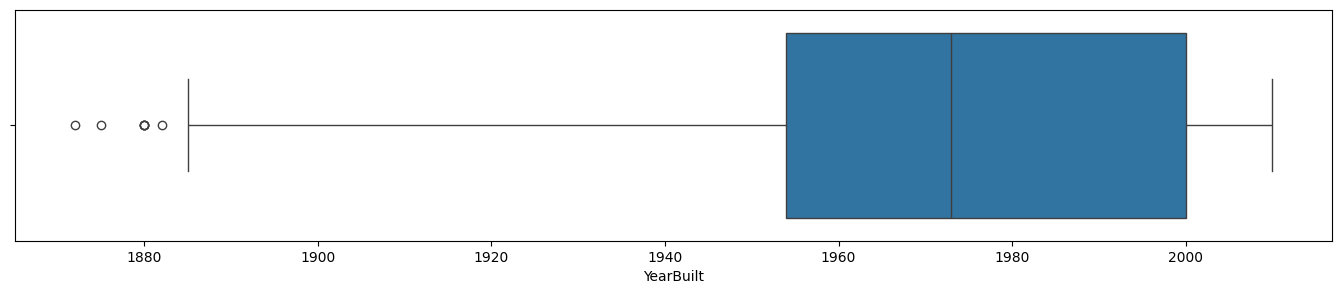

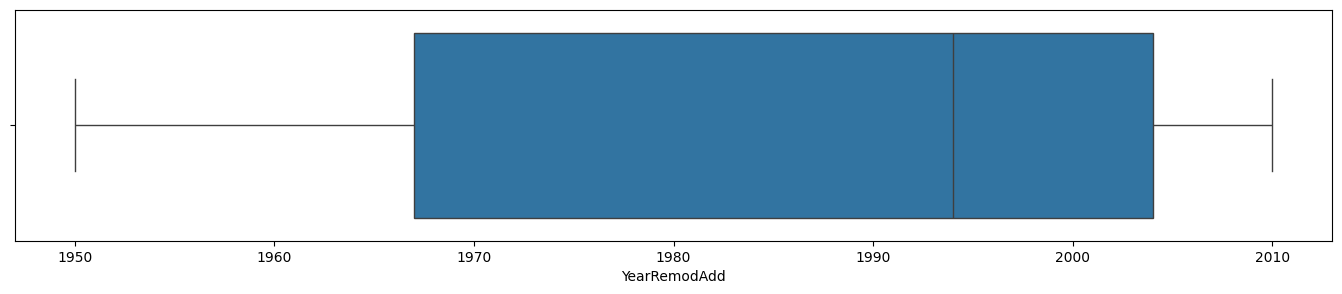

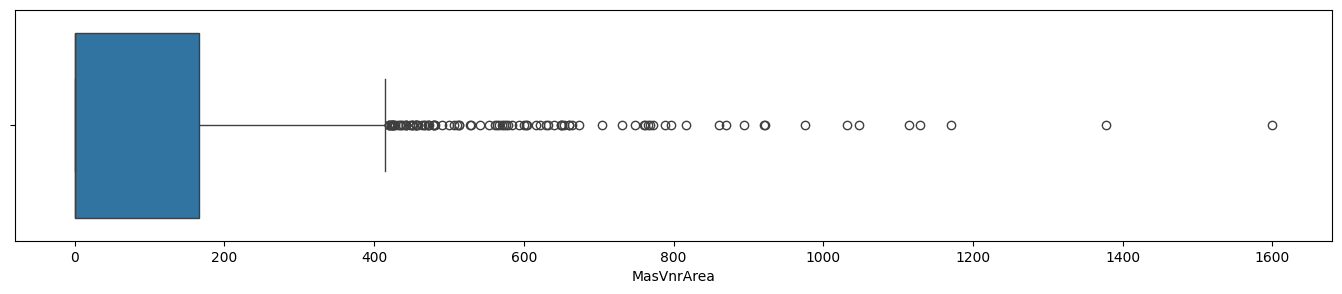

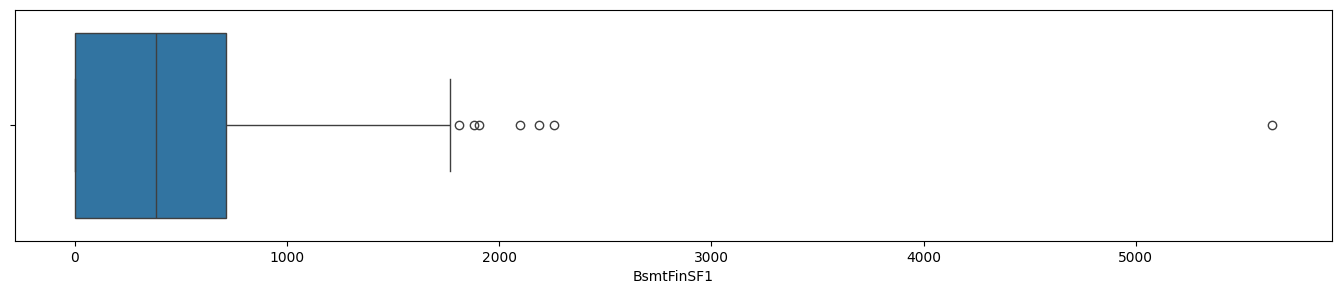

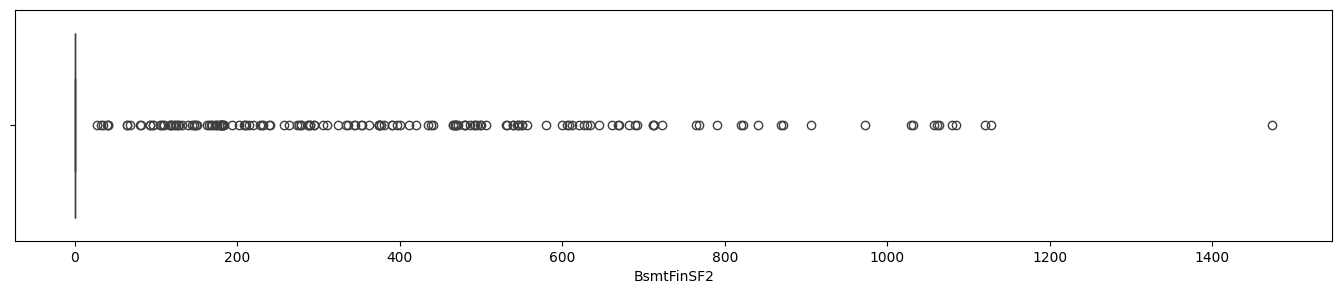

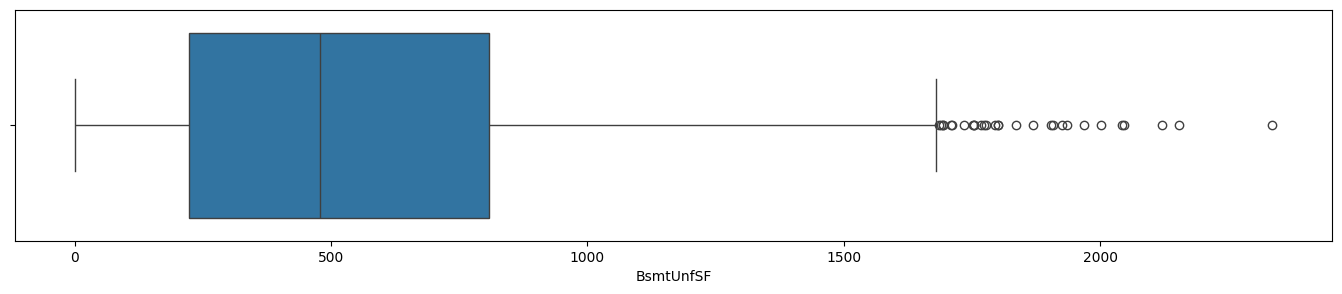

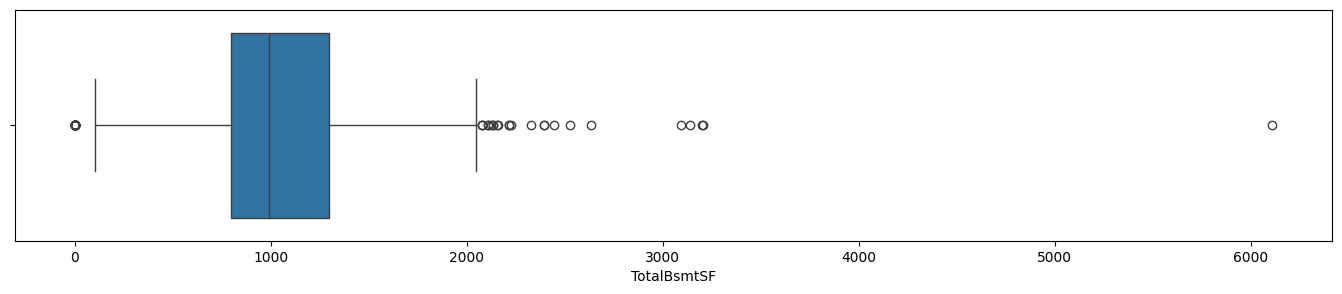

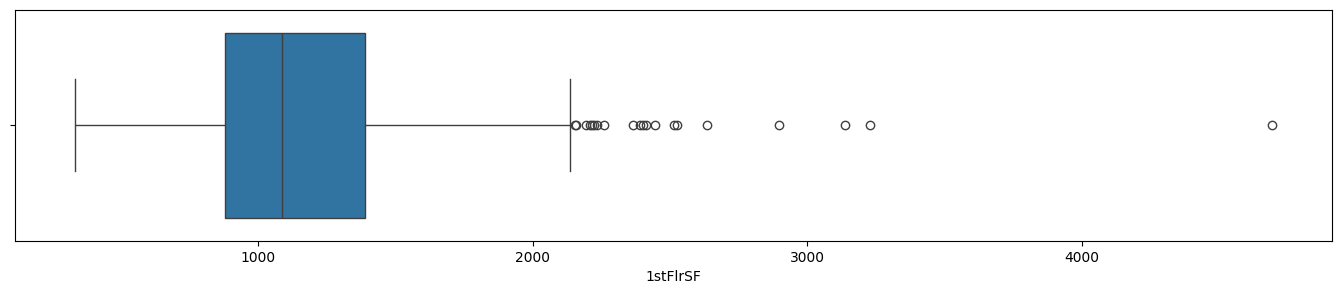

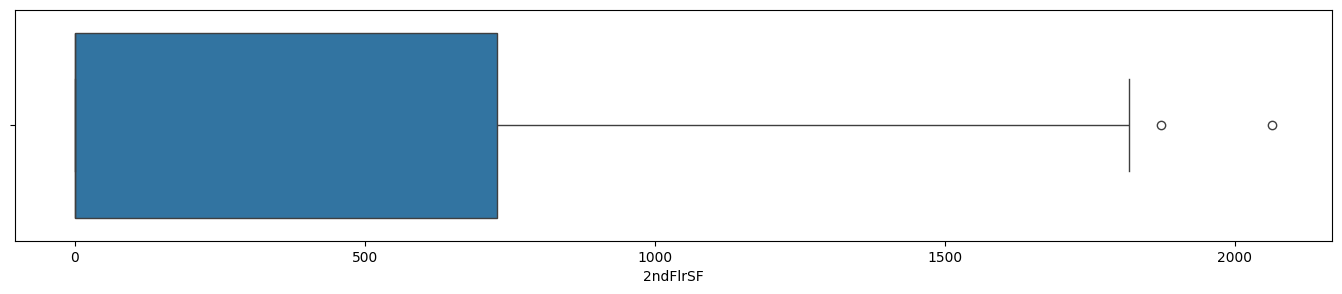

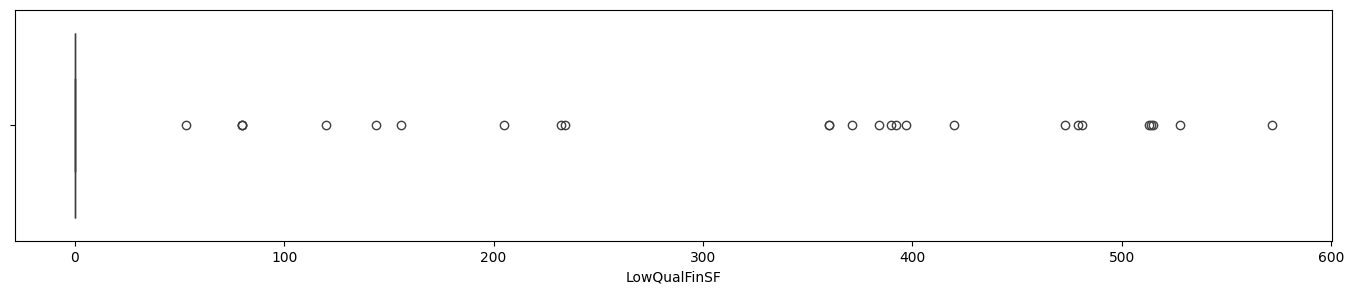

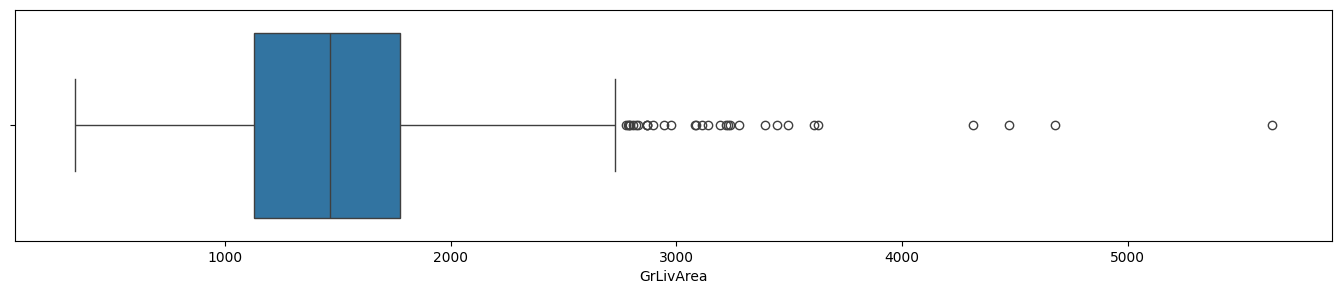

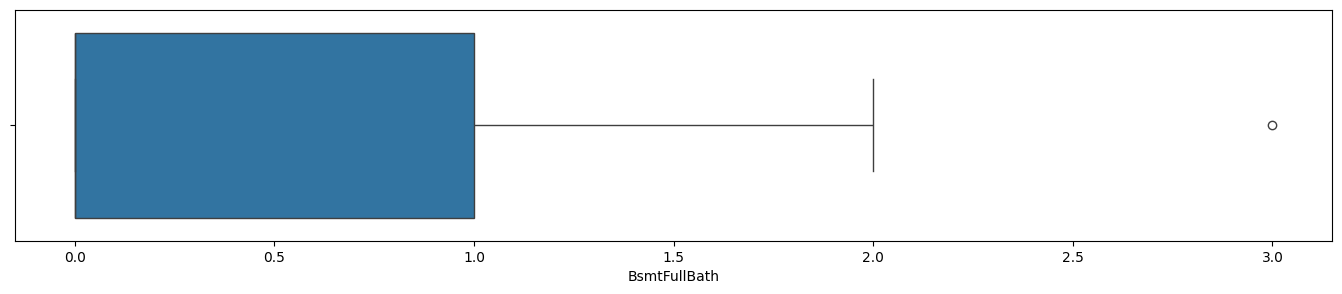

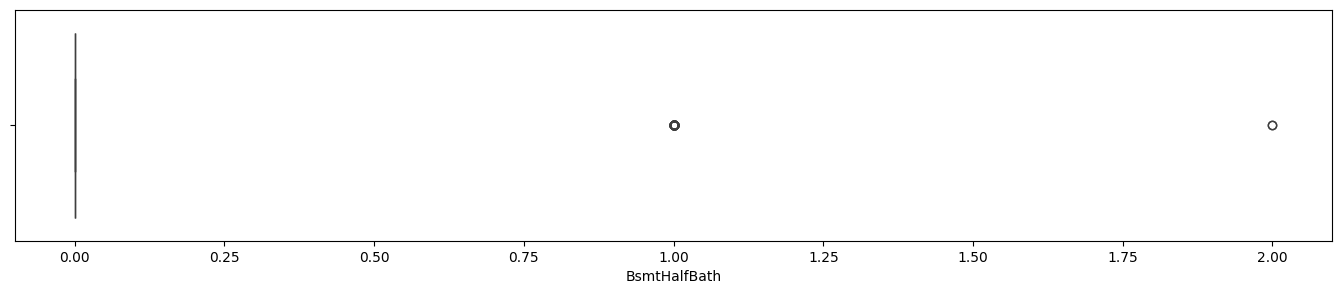

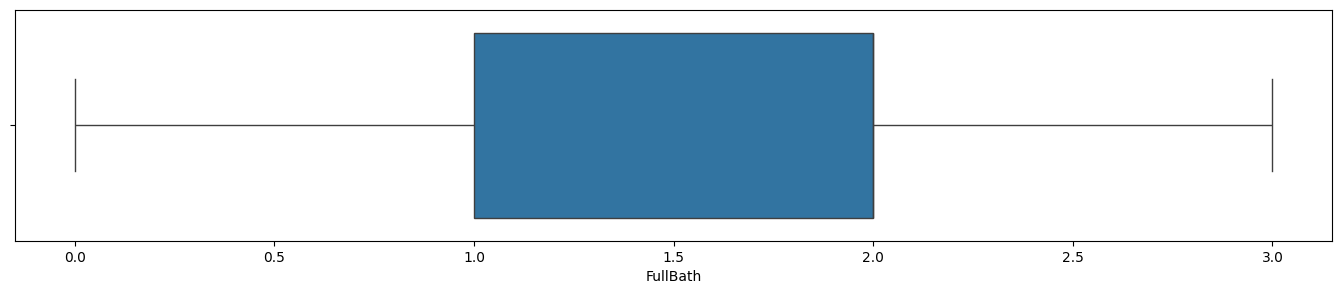

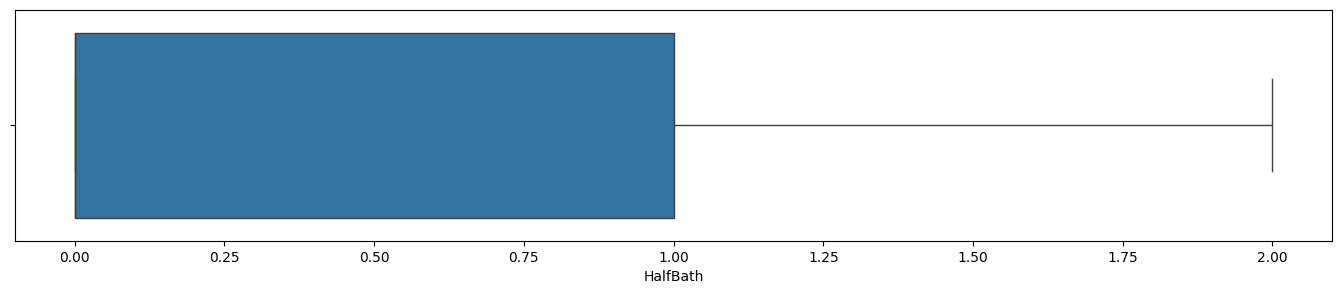

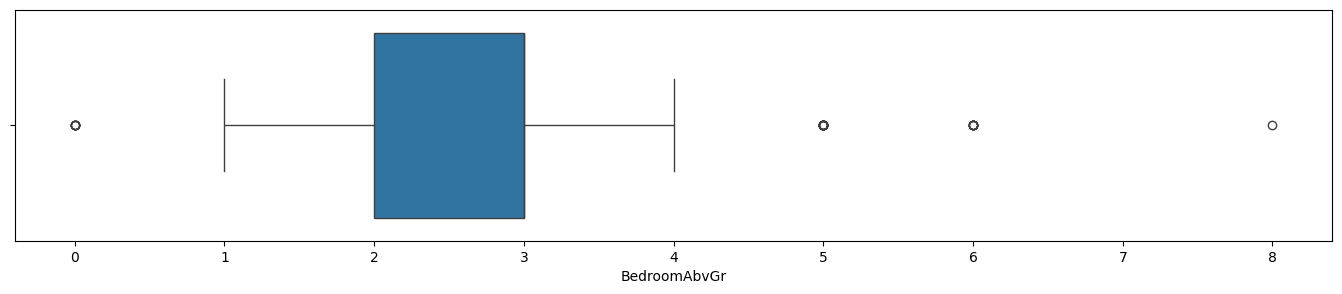

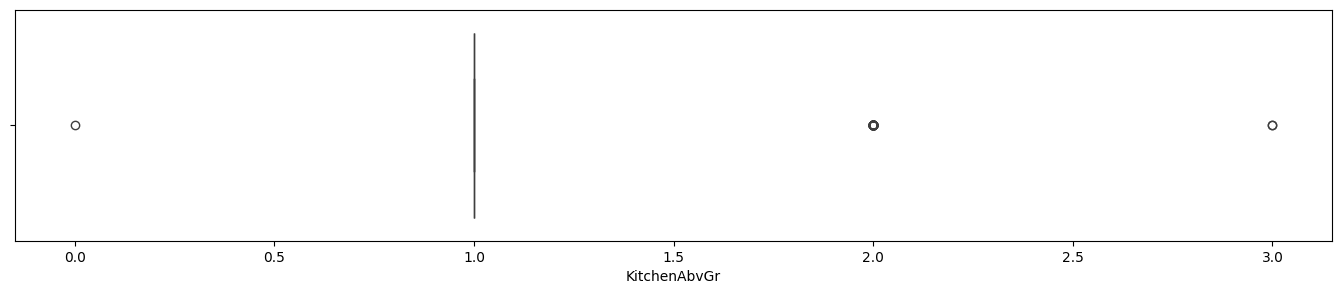

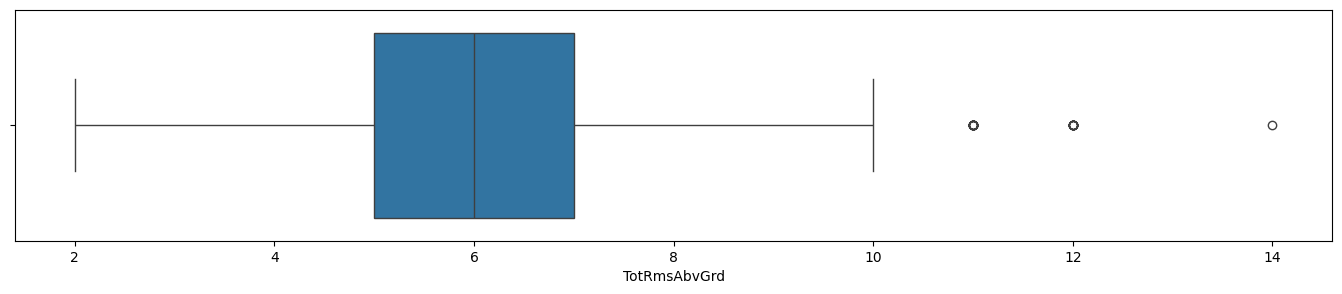

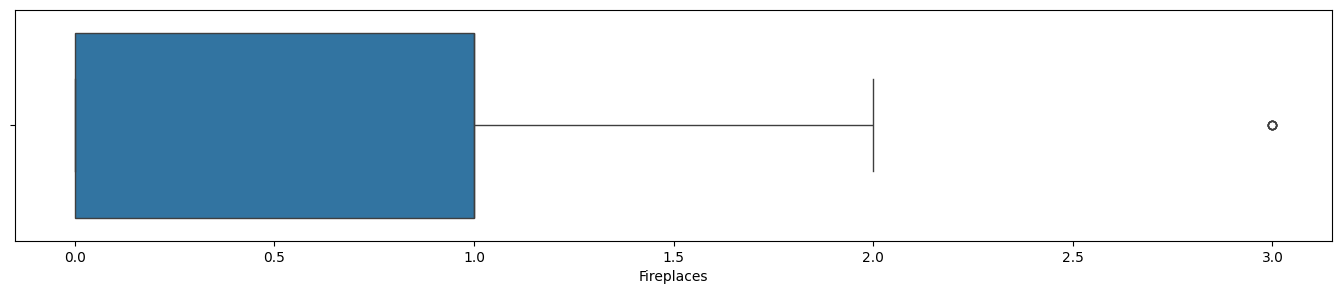

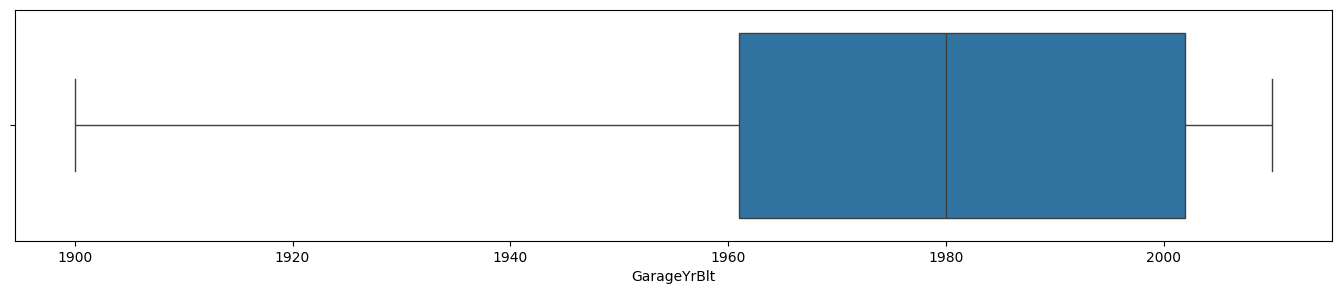

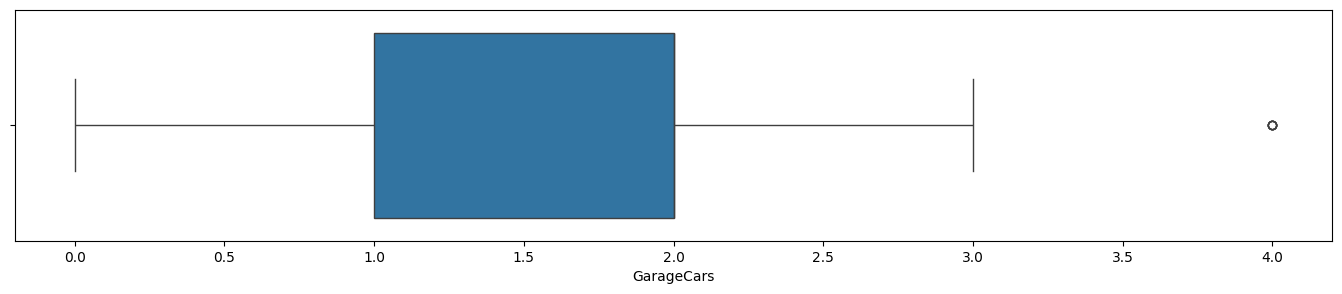

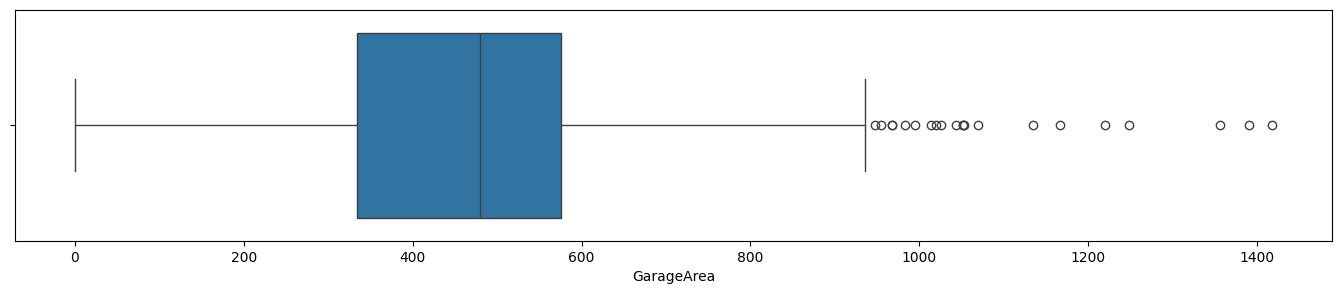

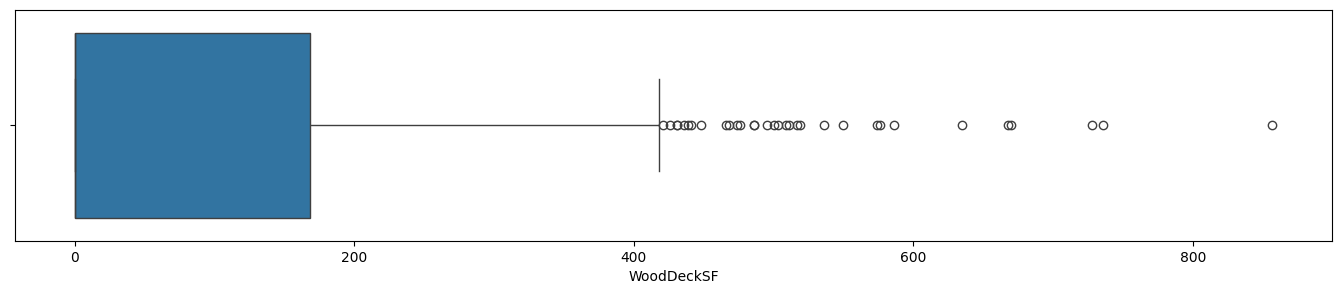

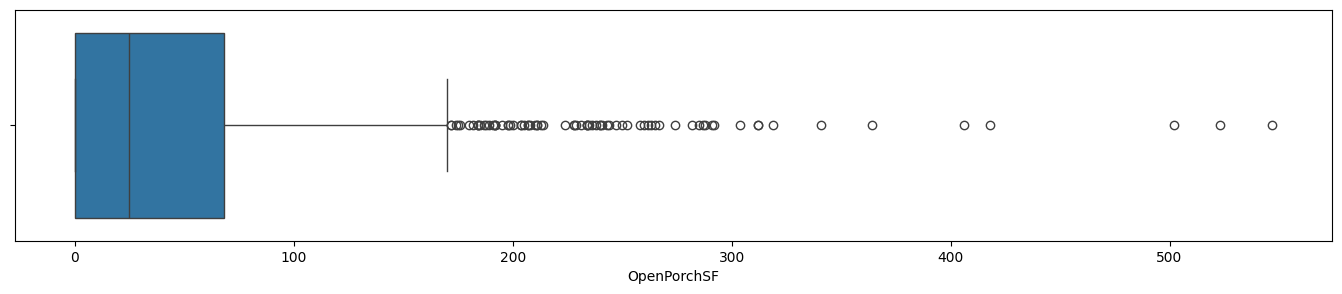

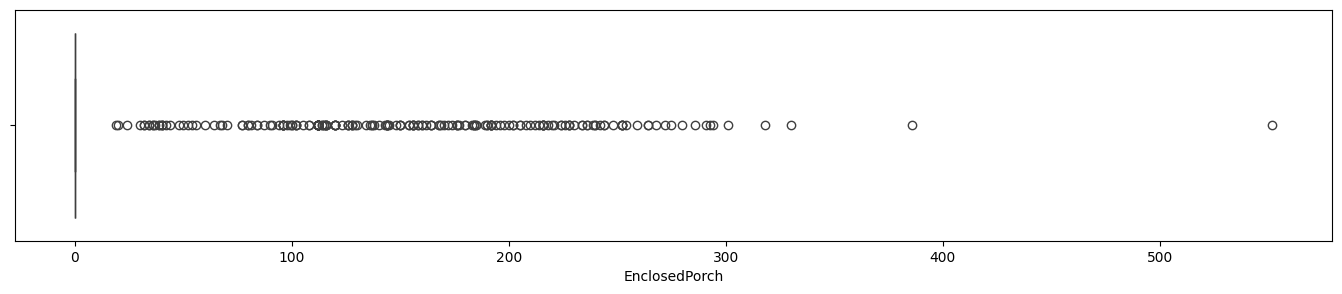

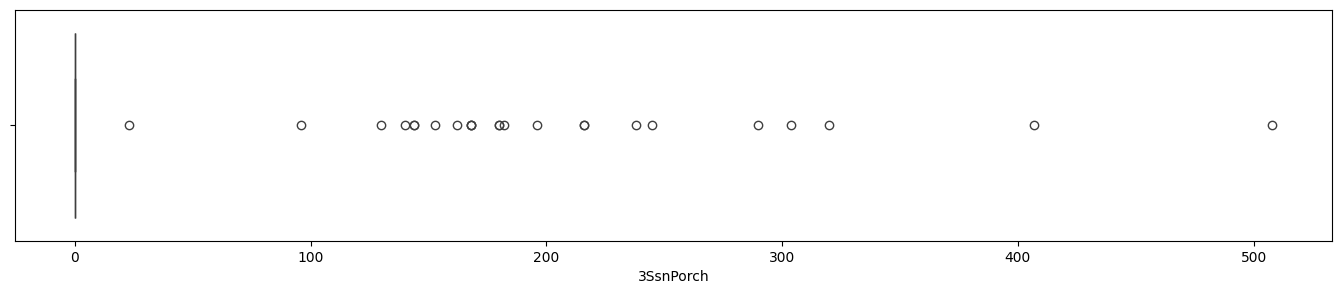

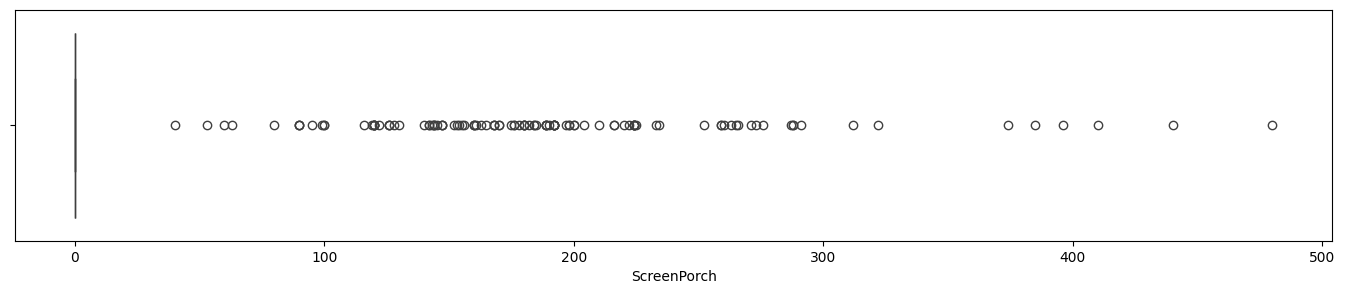

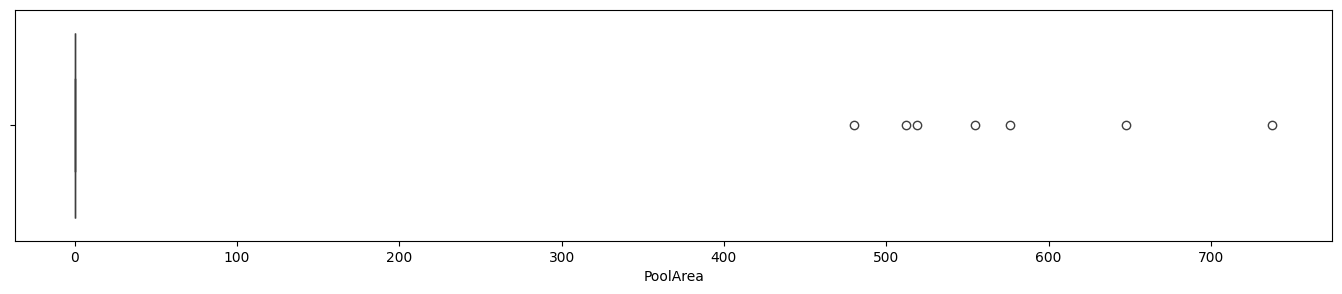

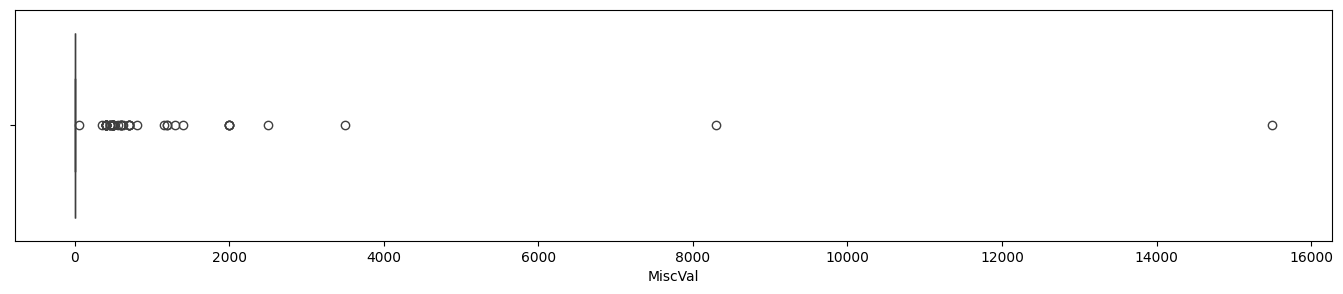

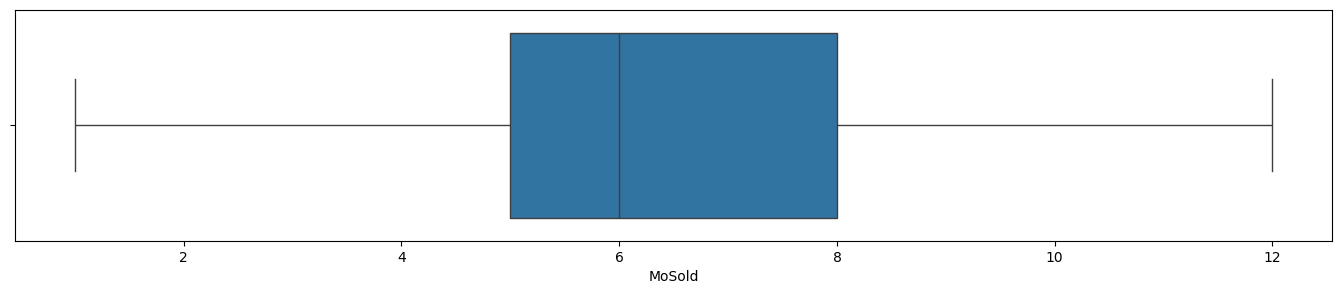

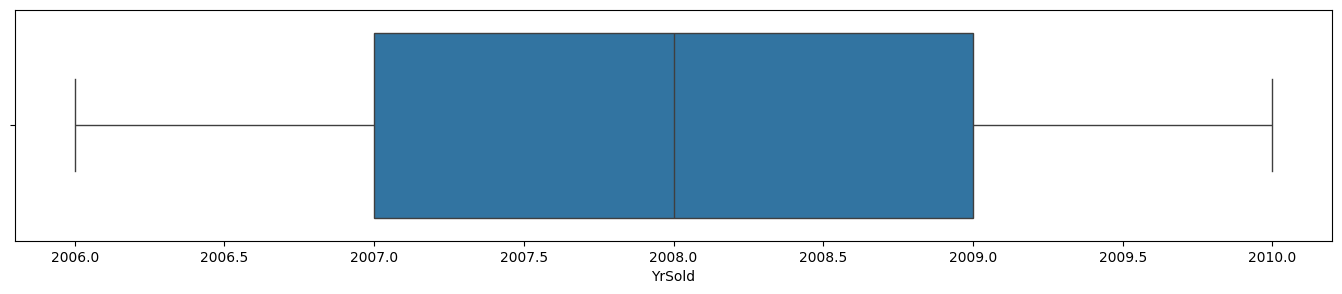

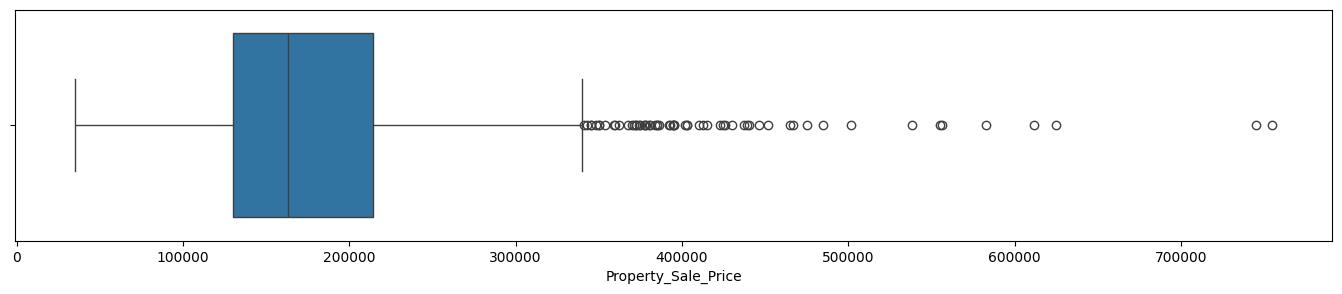

In [23]:
for column in df_nums:
        plt.figure(figsize=(17,3))
        sns.boxplot(data=df_nums, x=column)


/tmp/ipykernel_9654/3381485613.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,5))


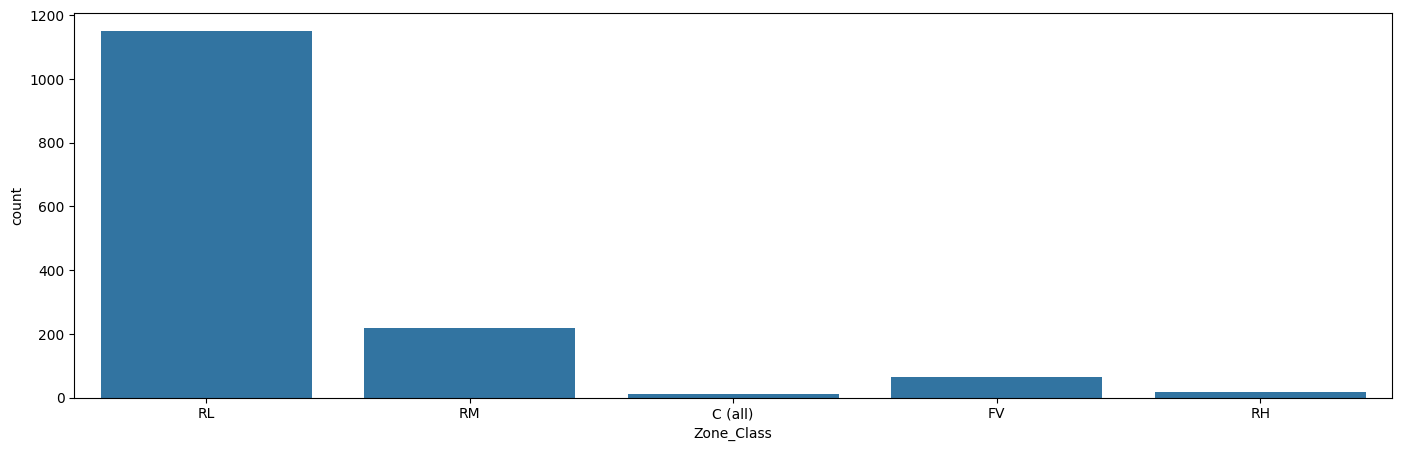

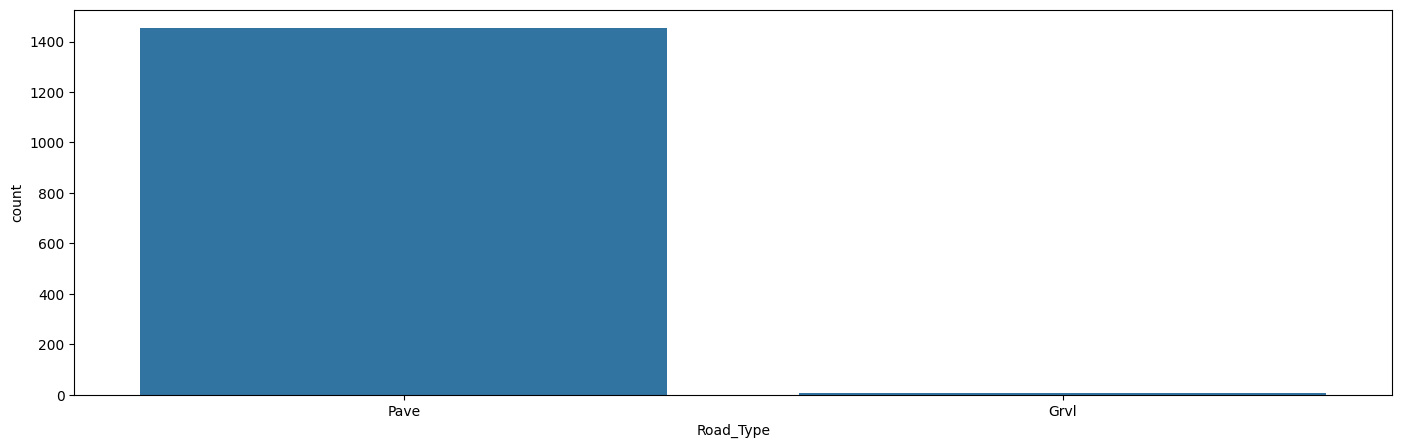

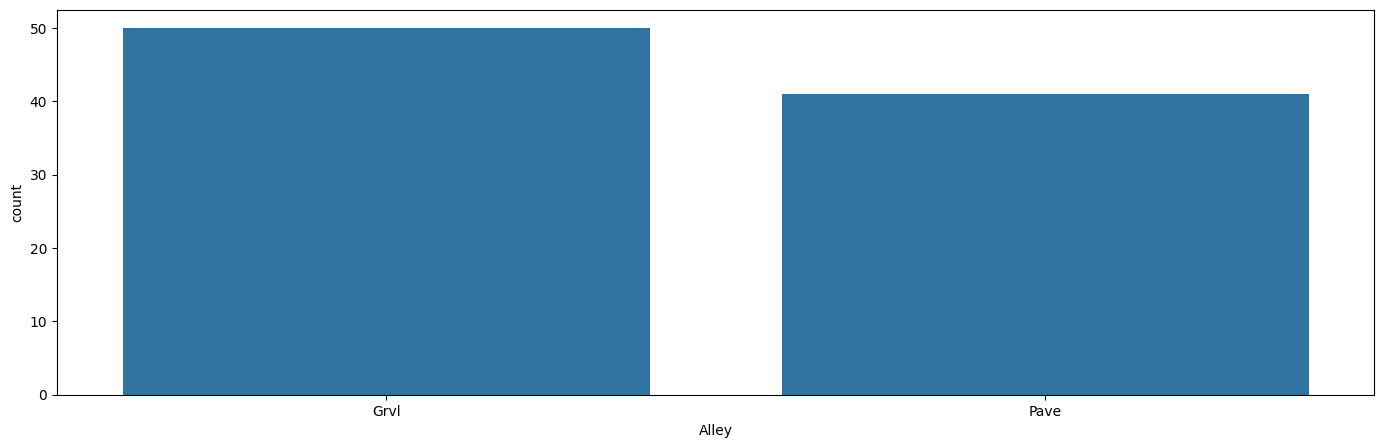

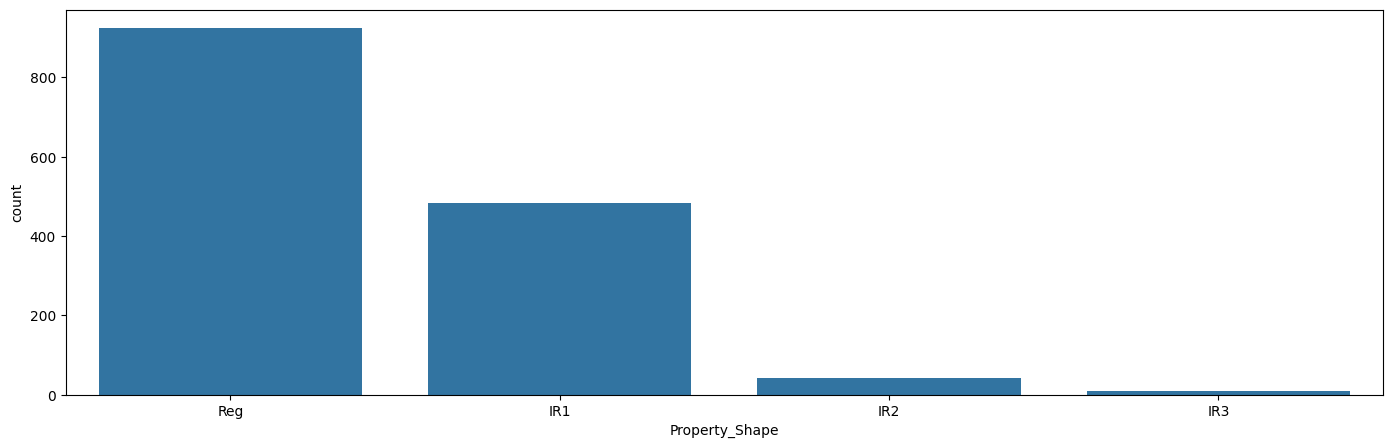

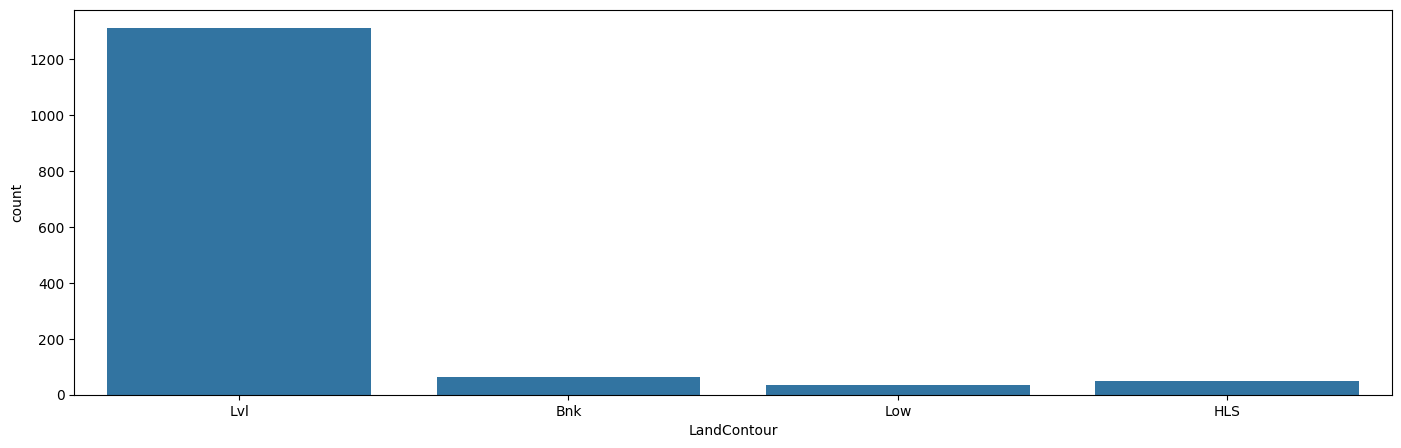

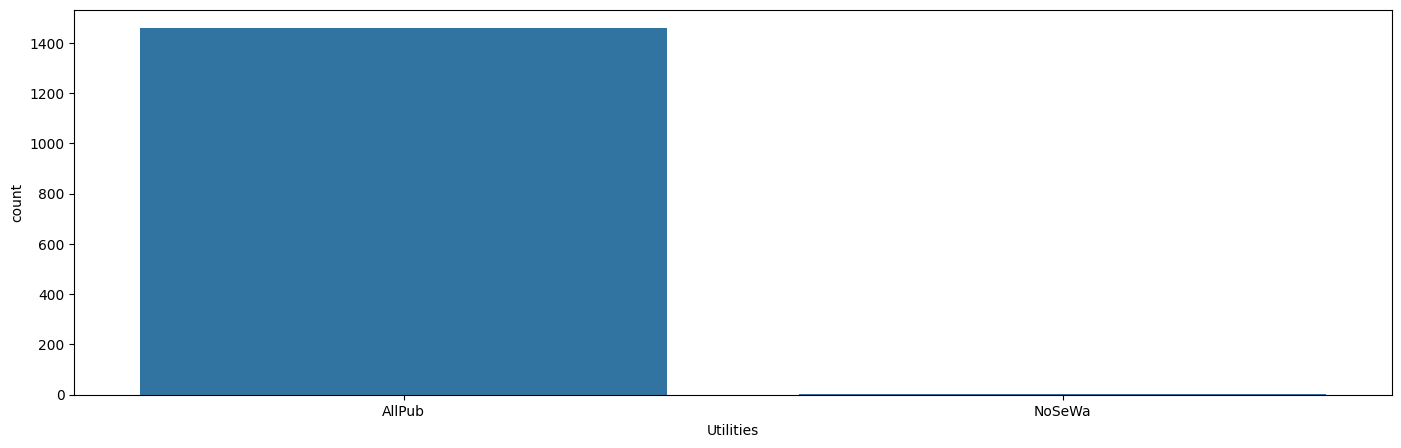

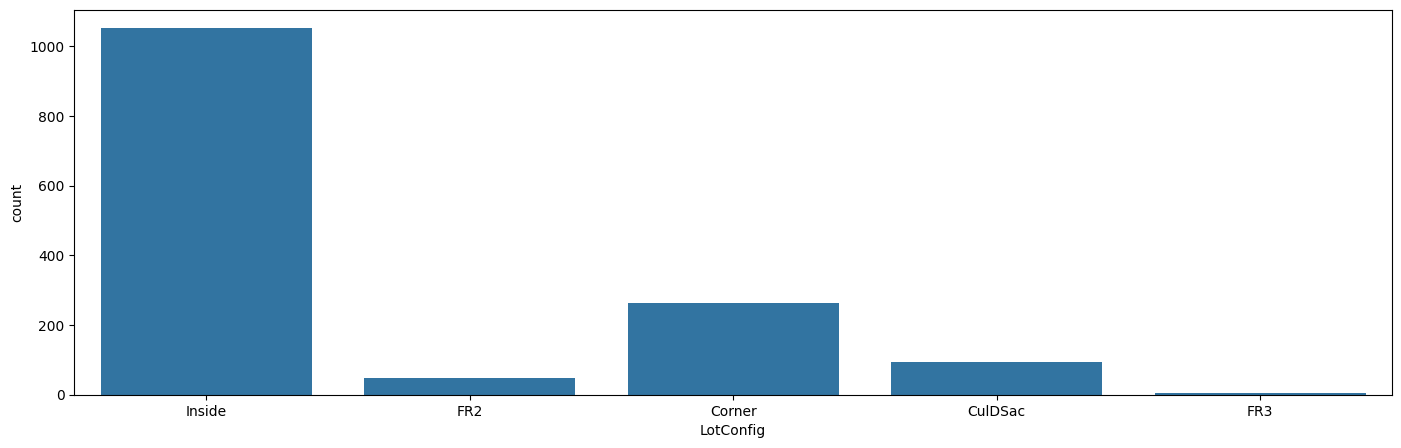

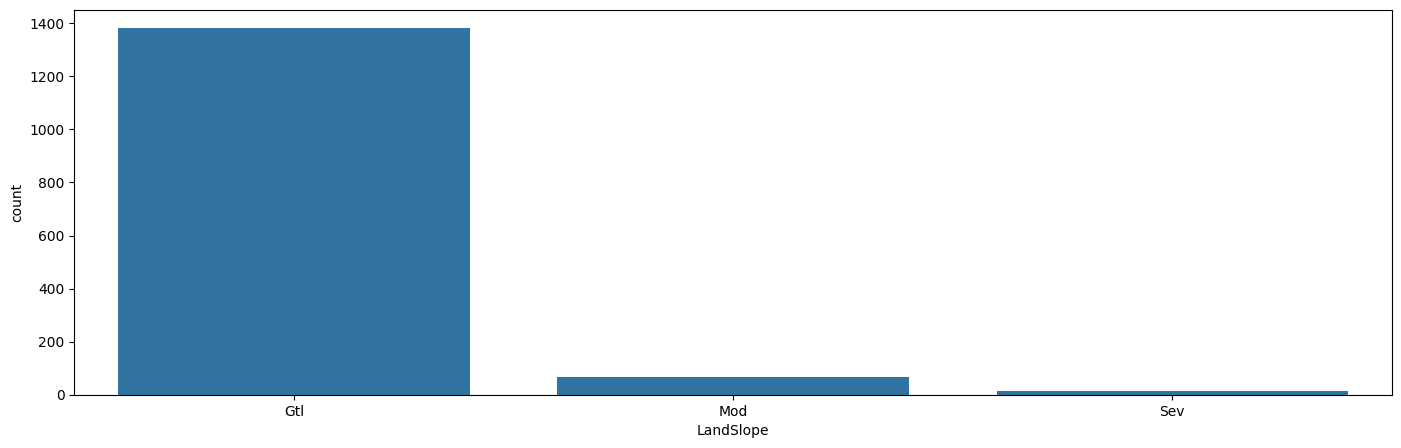

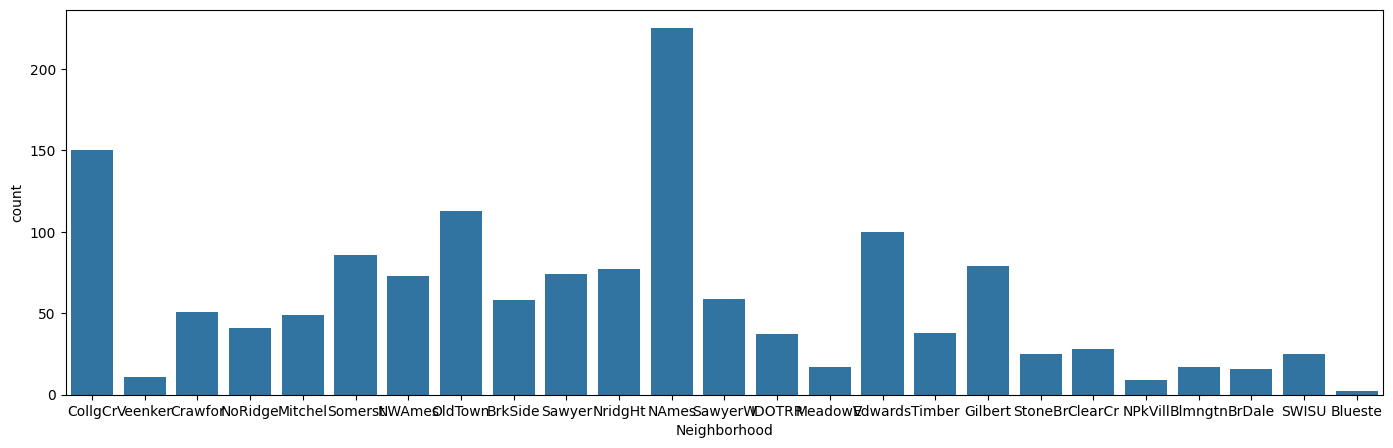

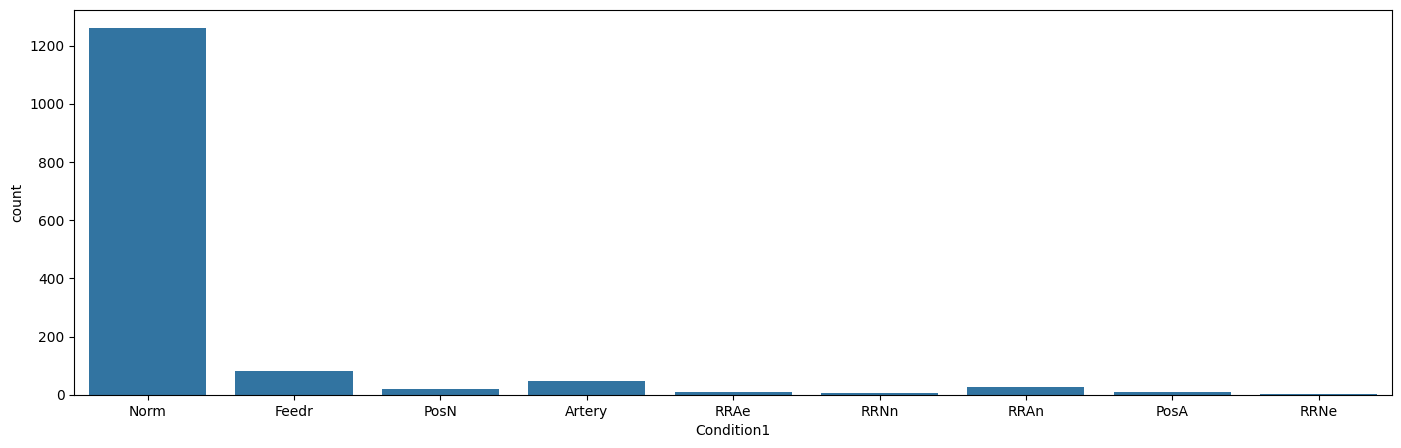

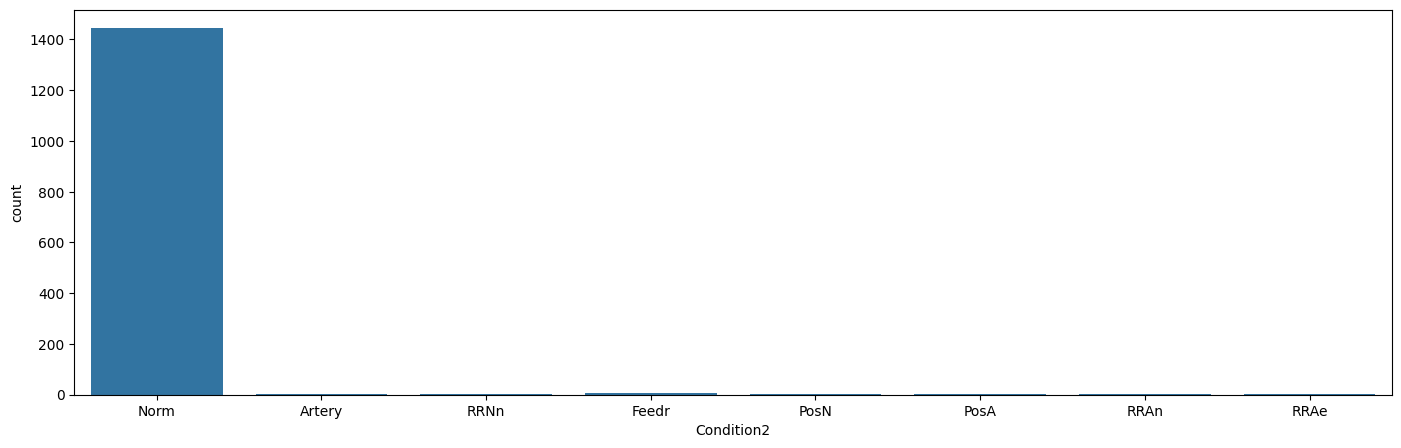

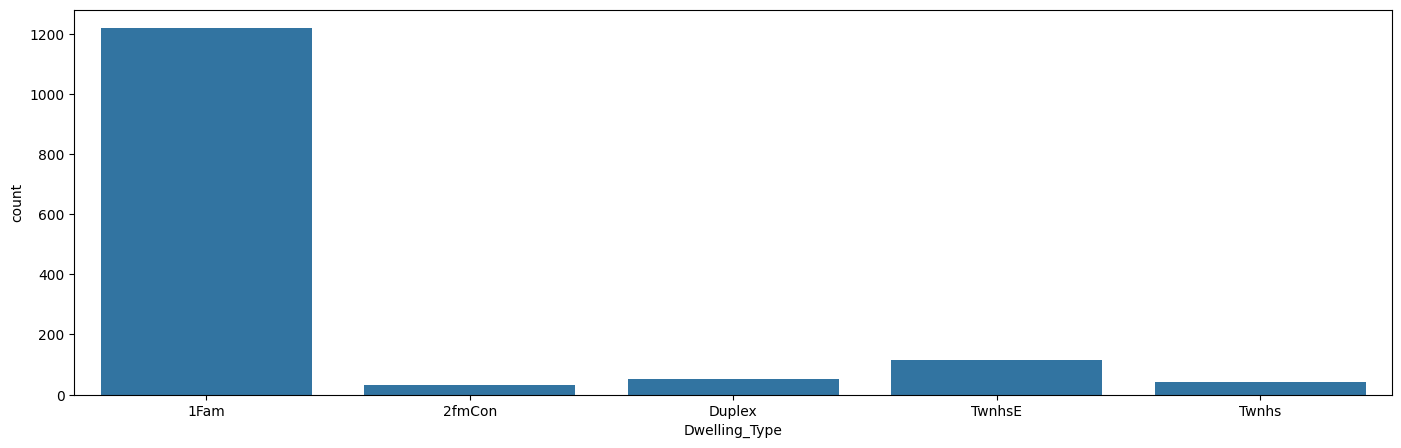

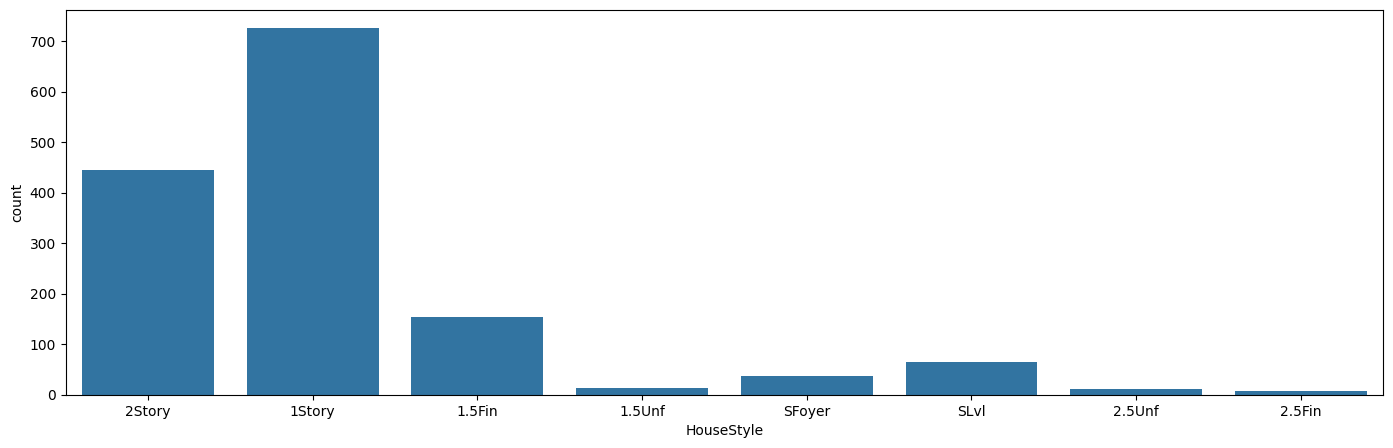

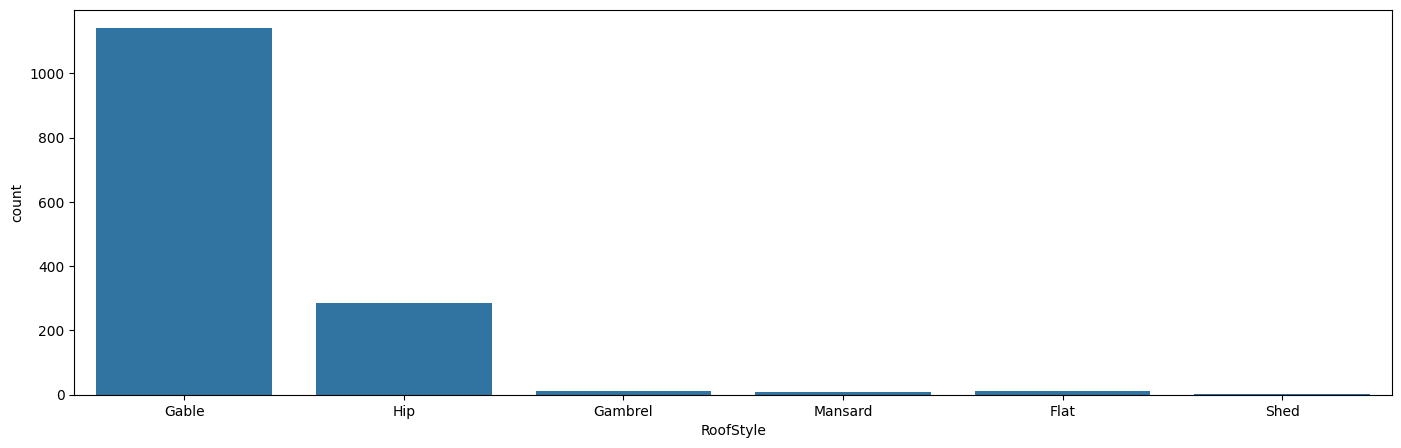

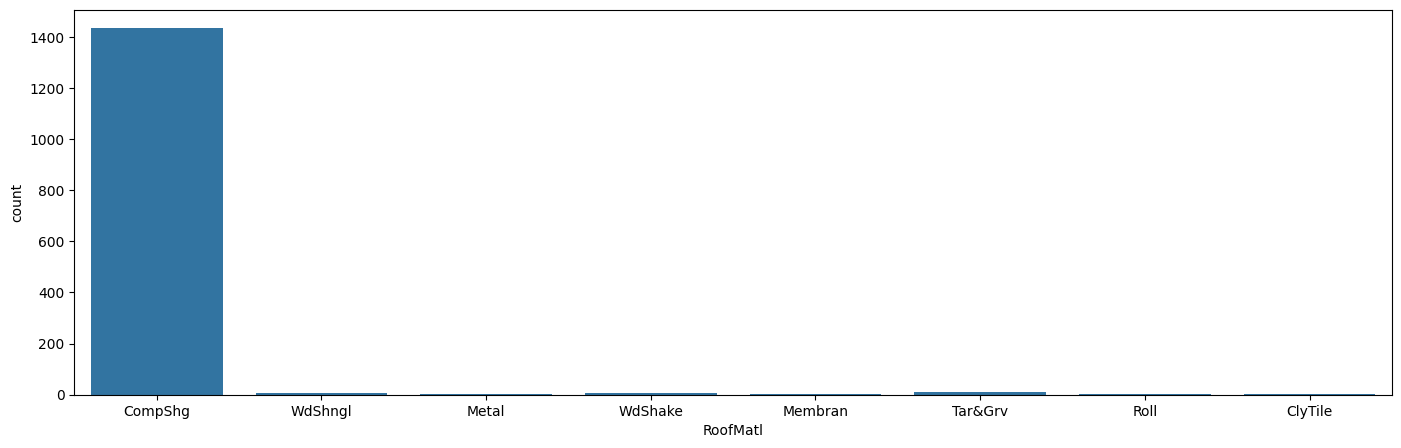

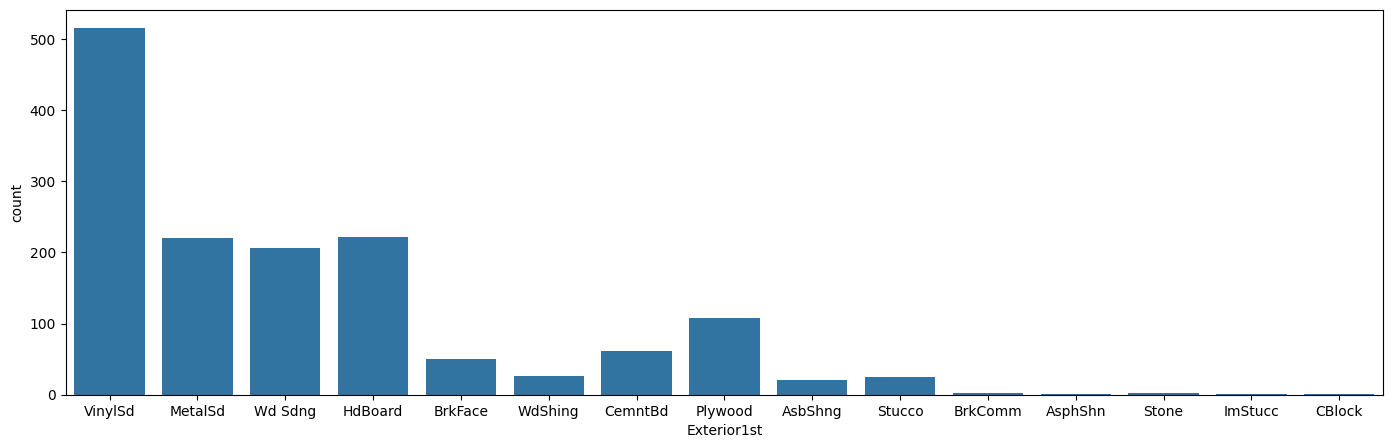

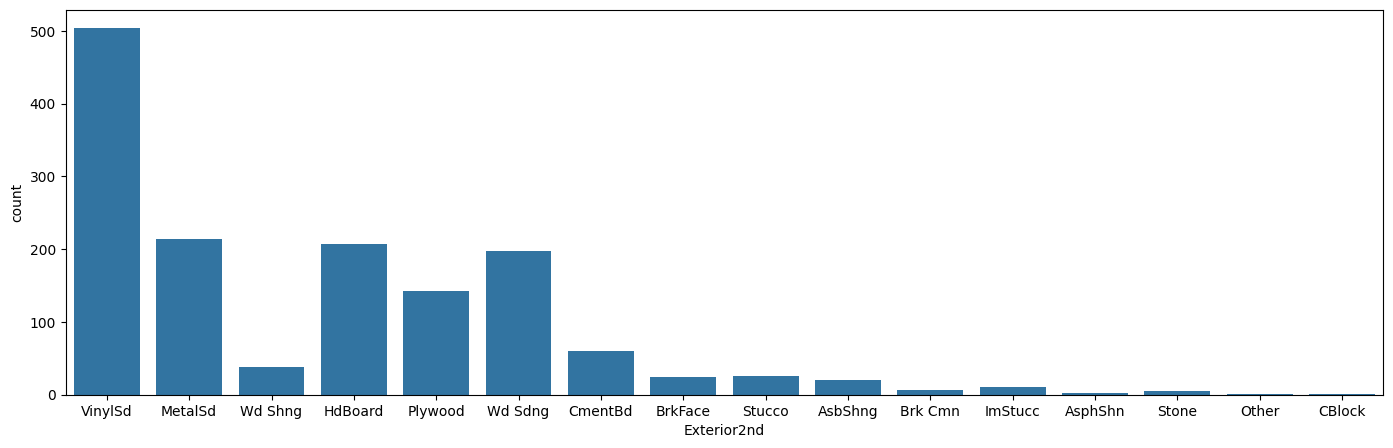

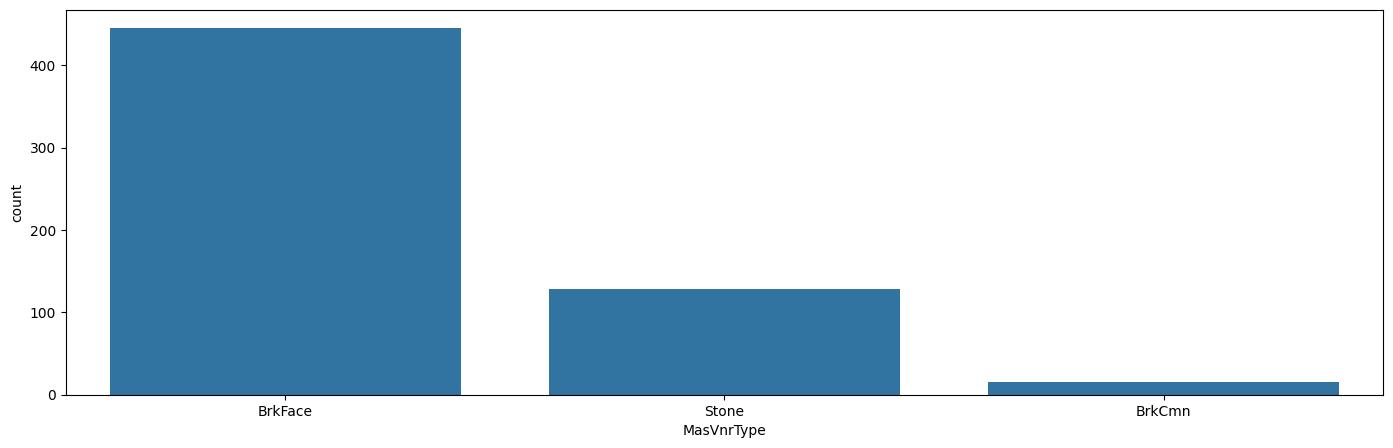

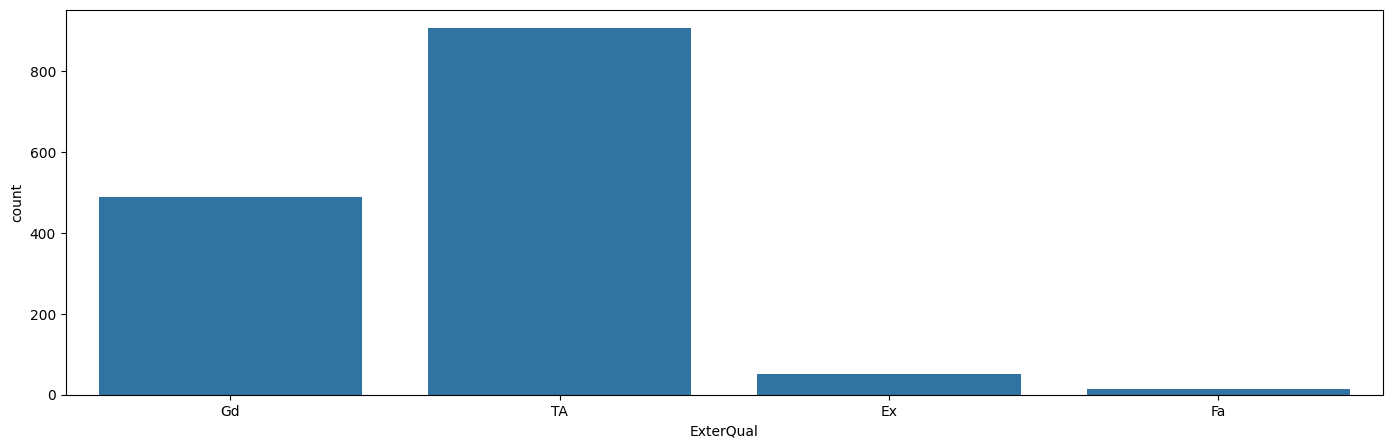

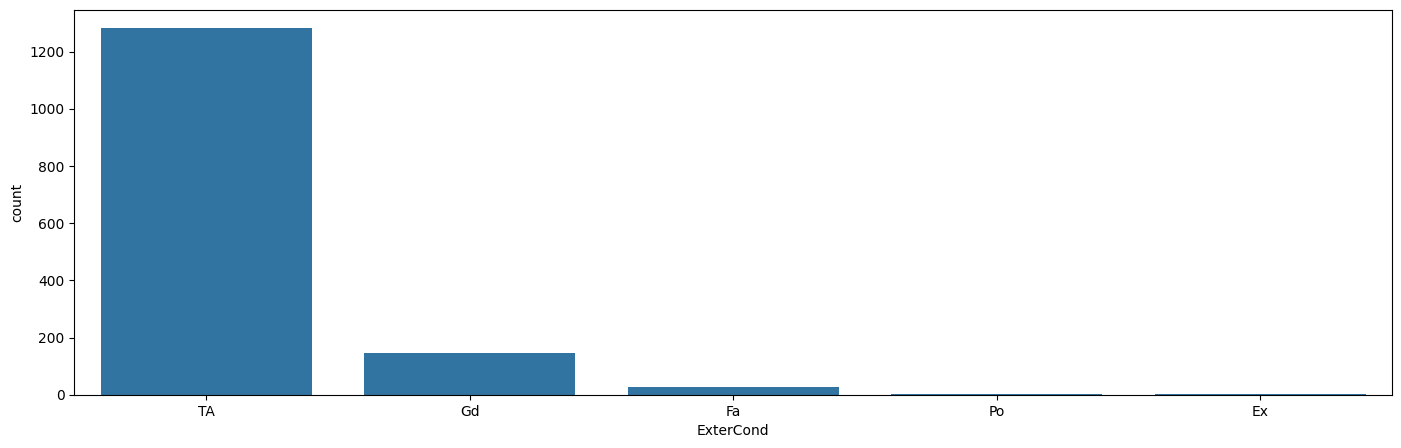

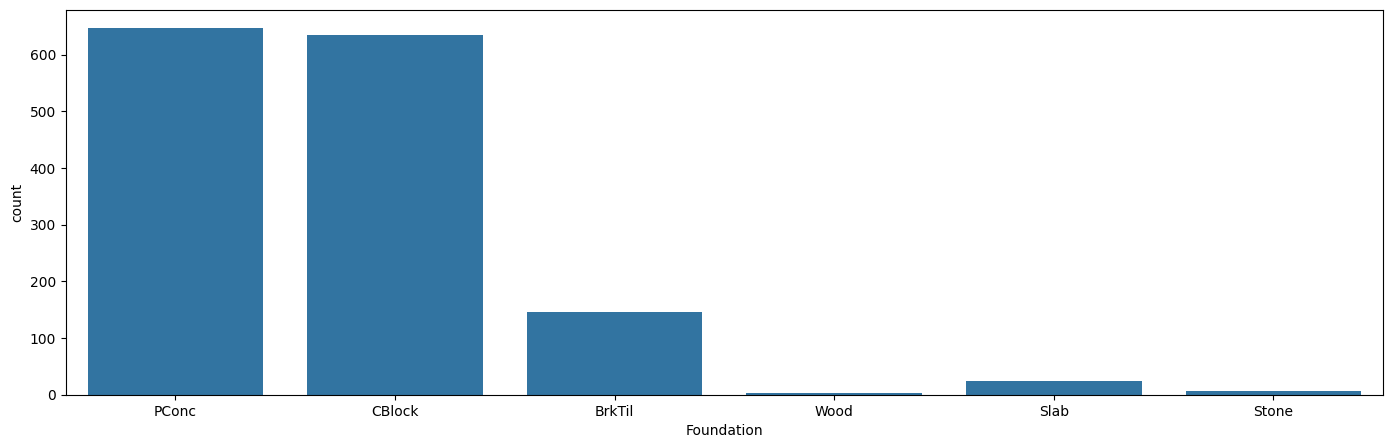

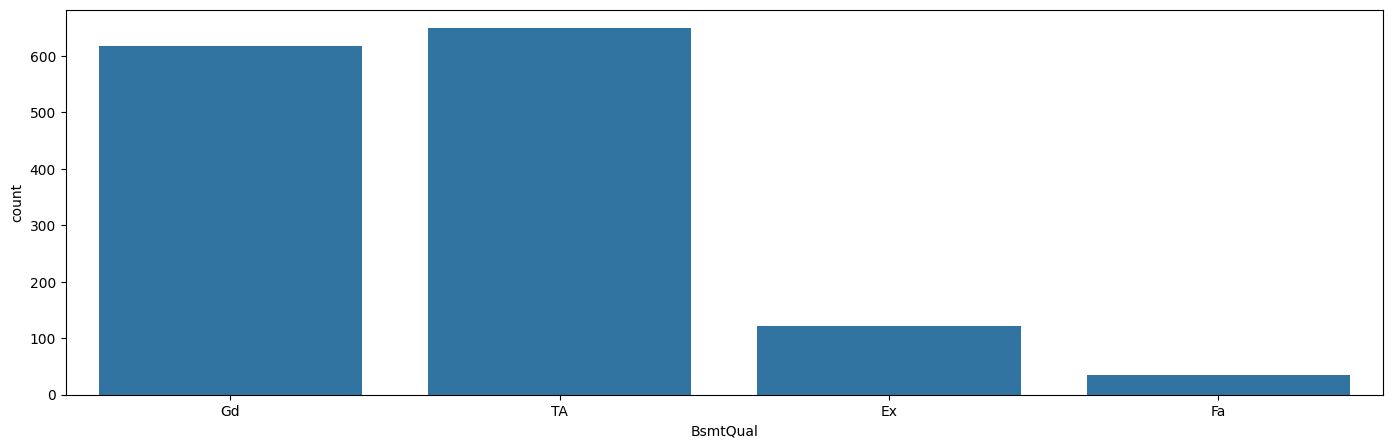

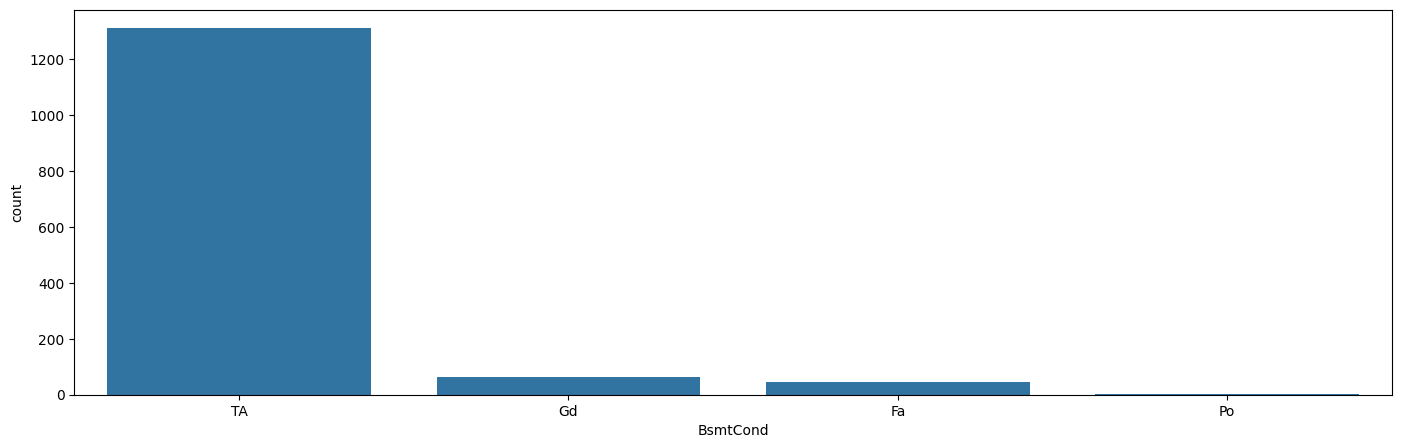

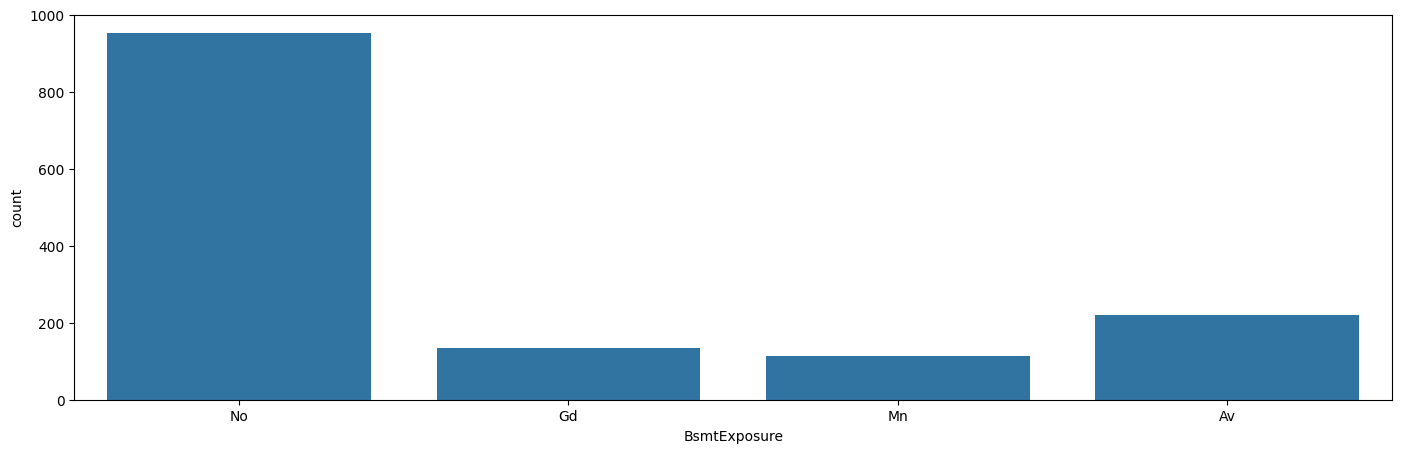

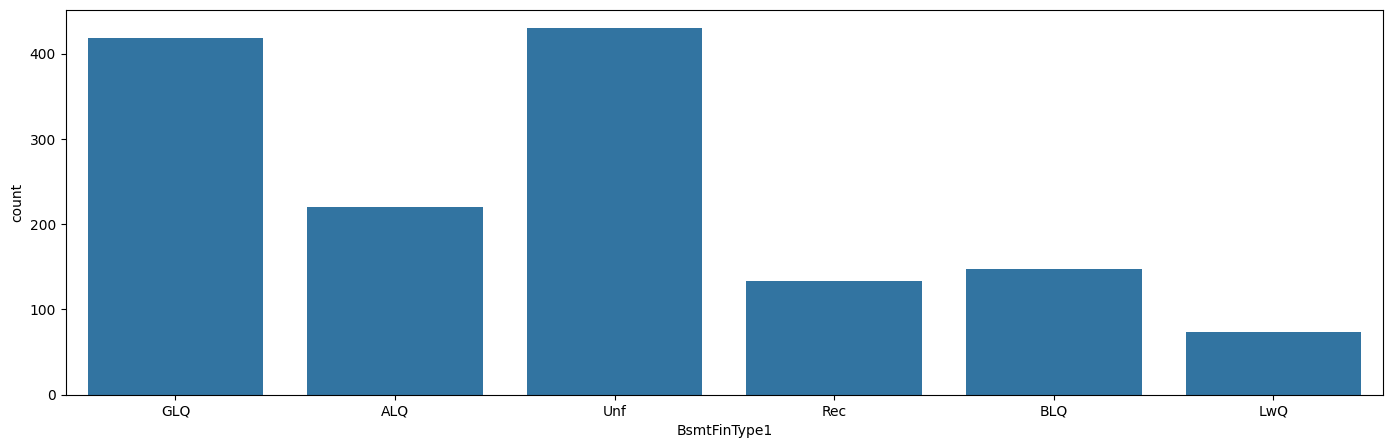

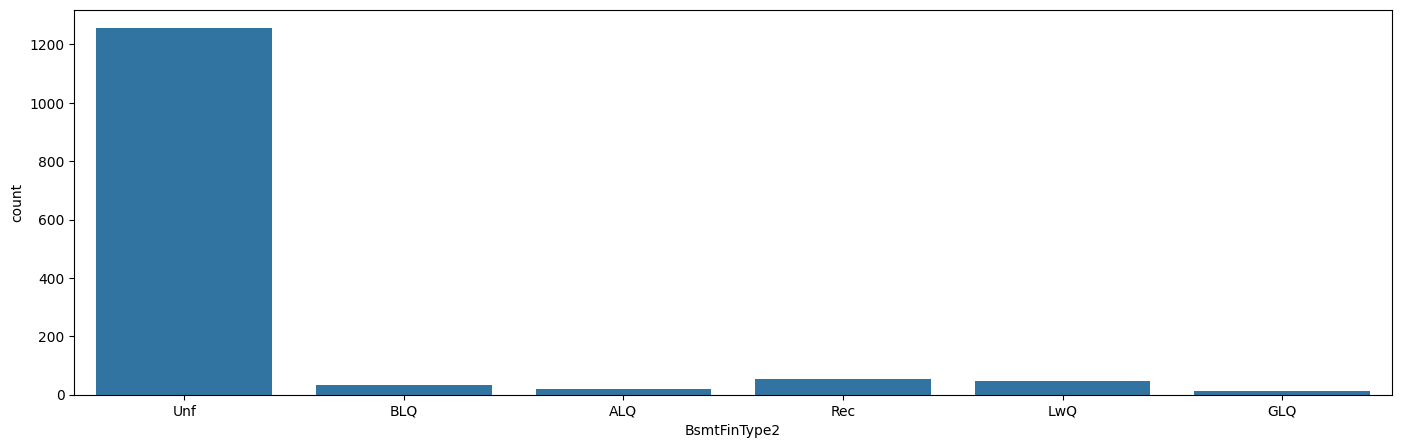

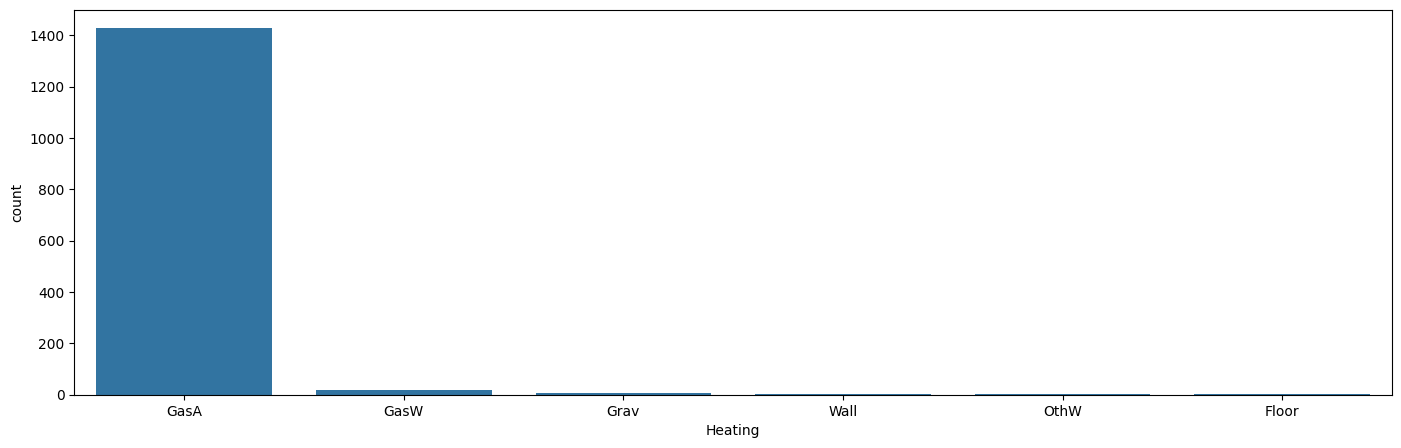

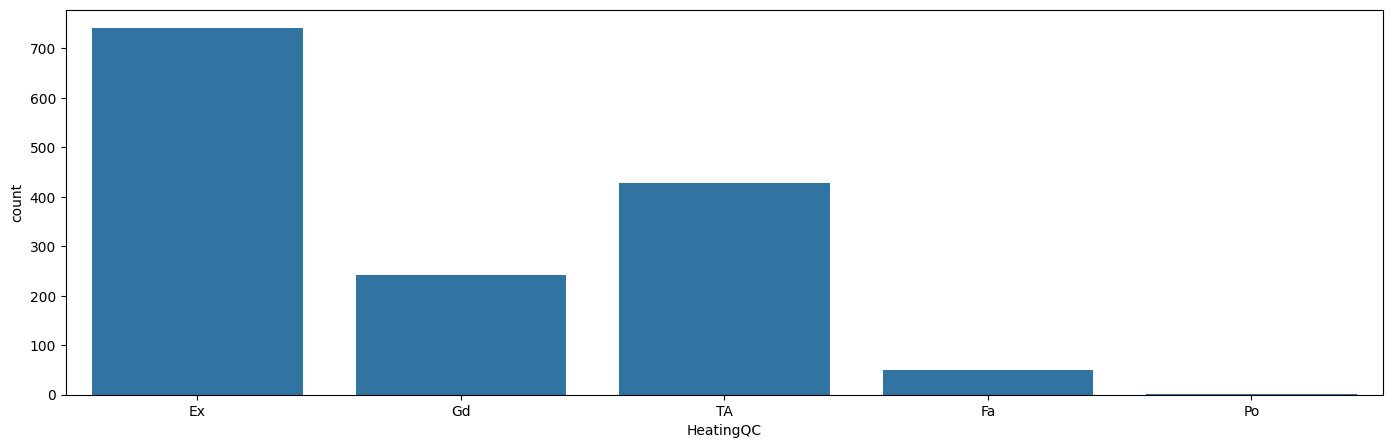

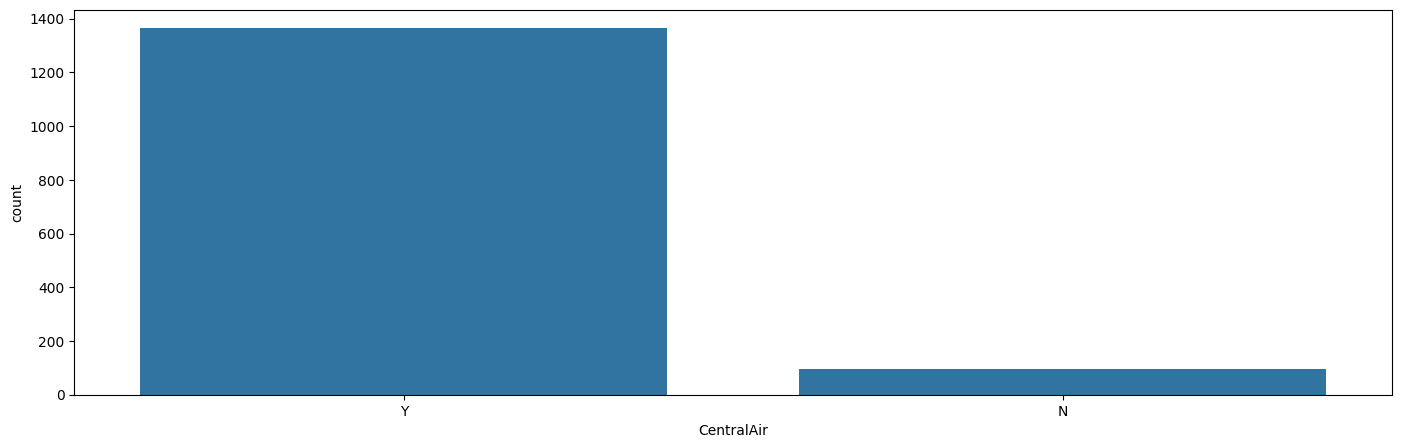

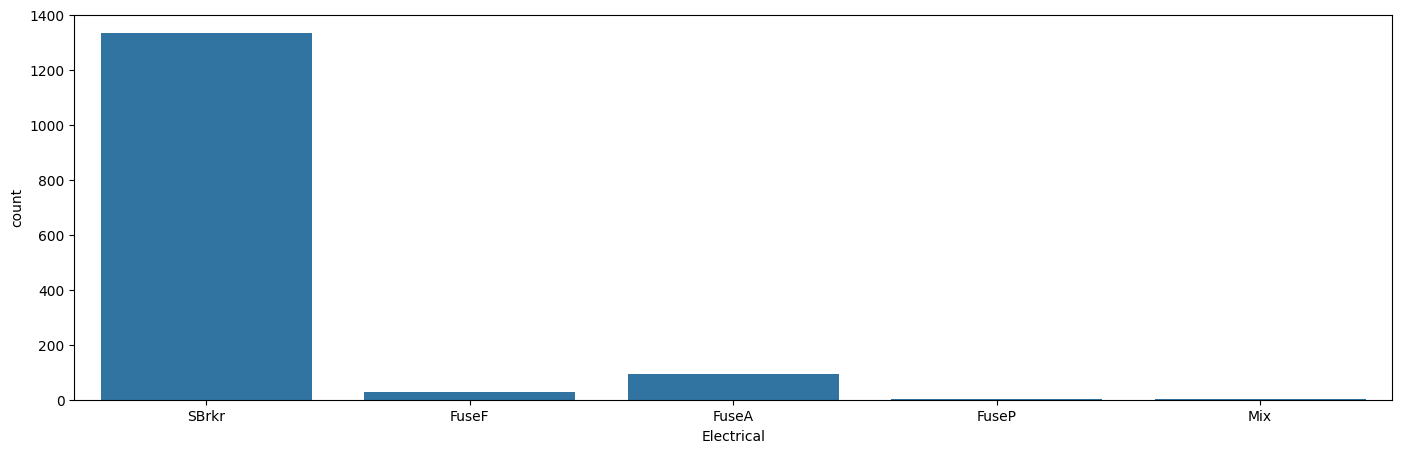

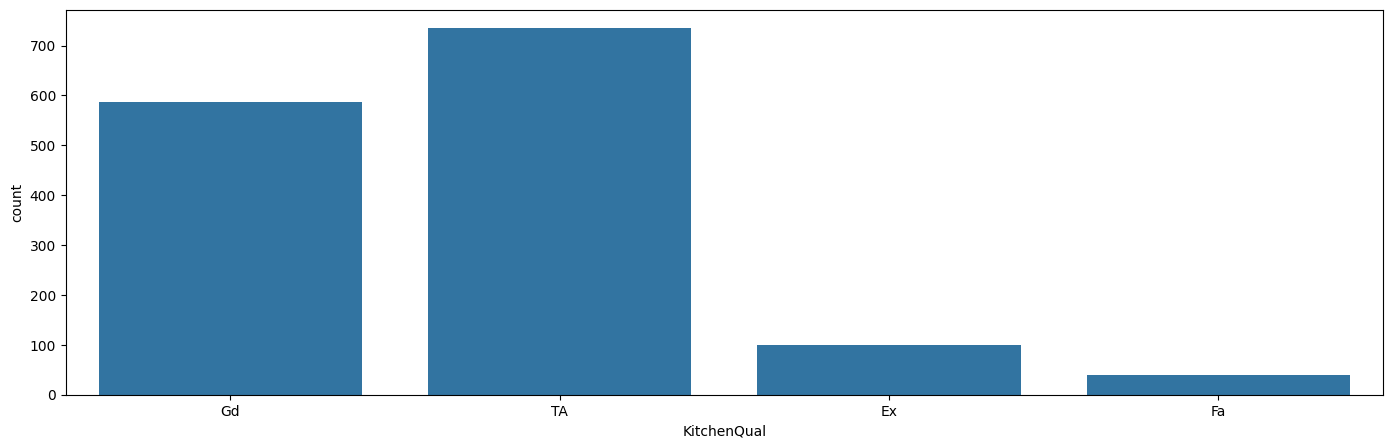

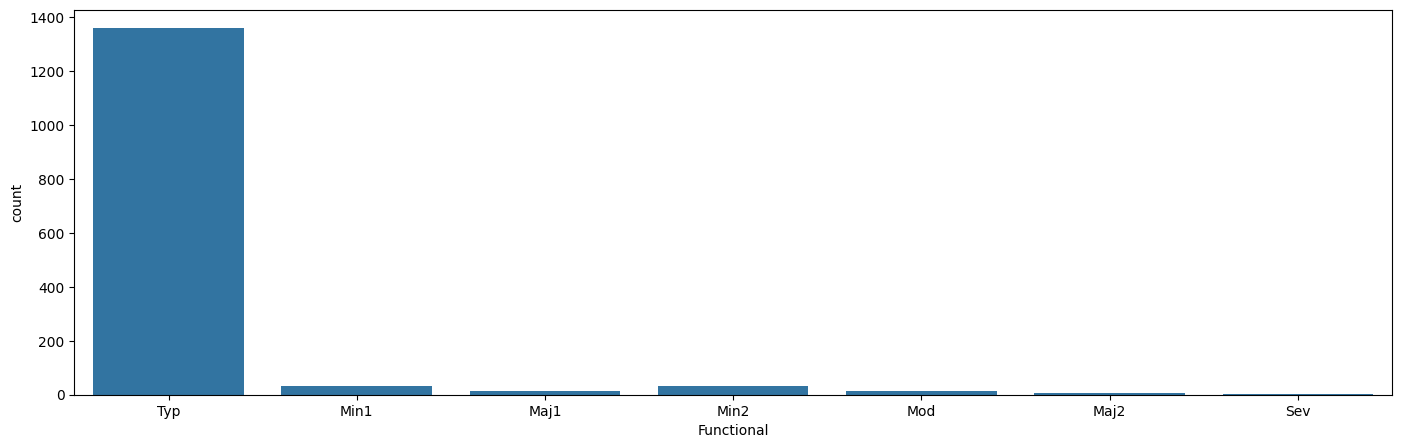

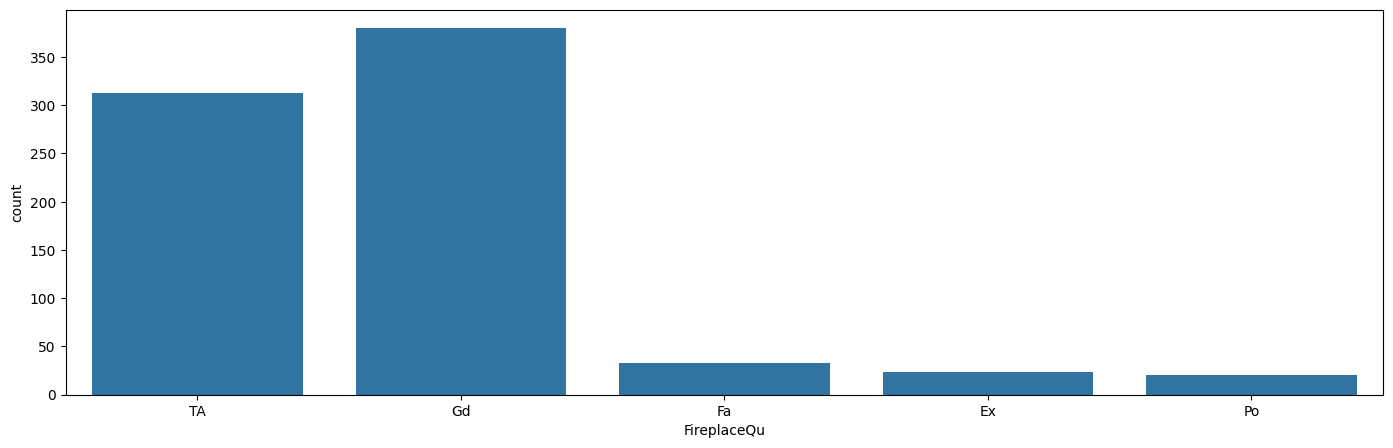

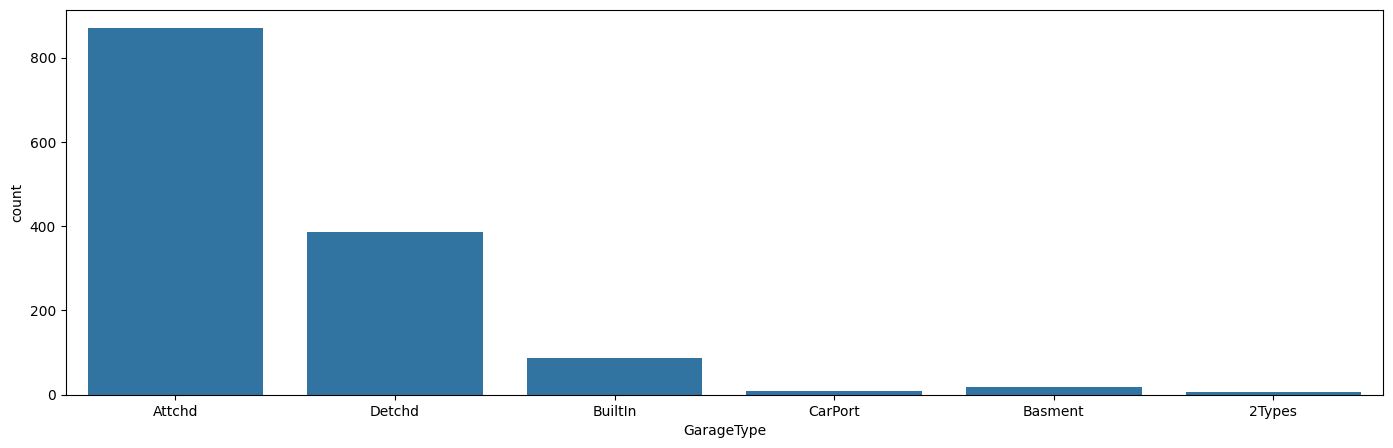

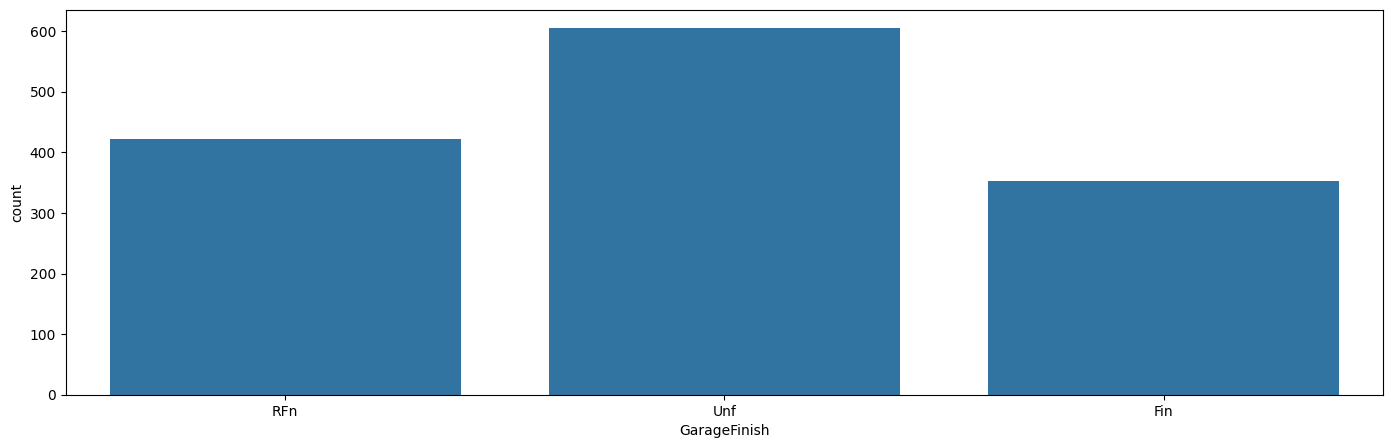

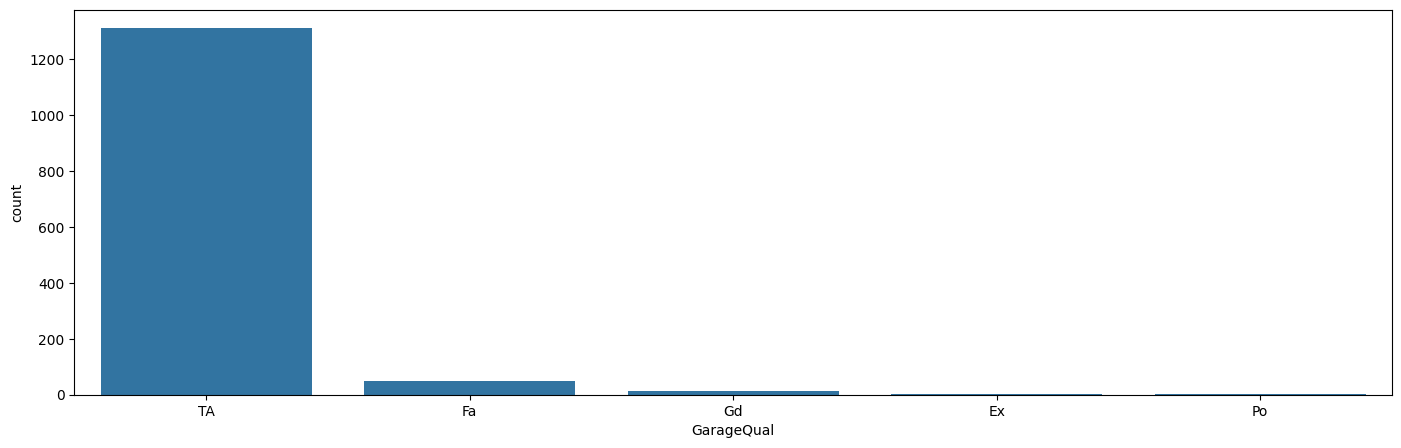

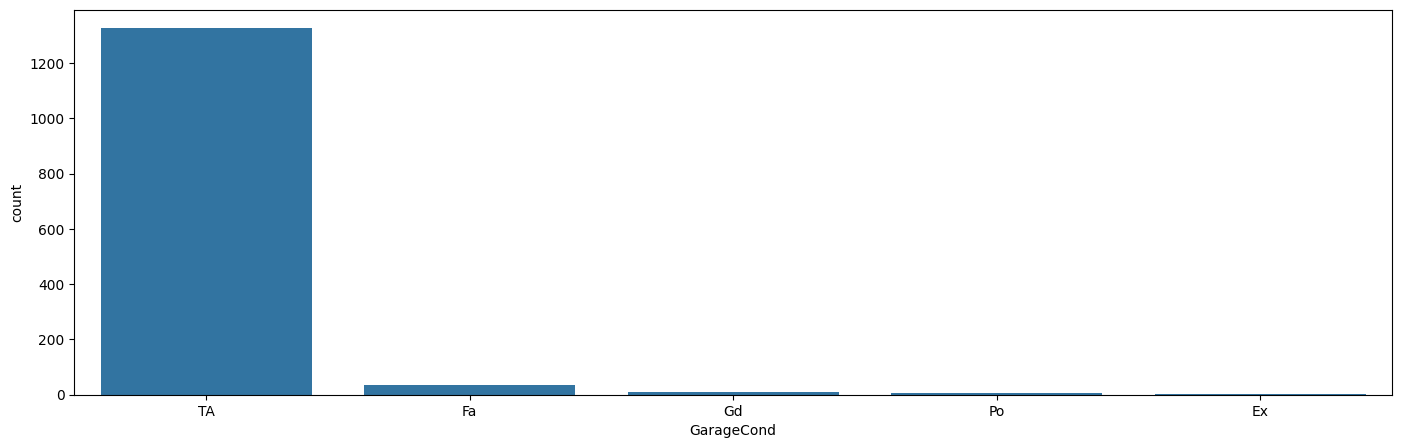

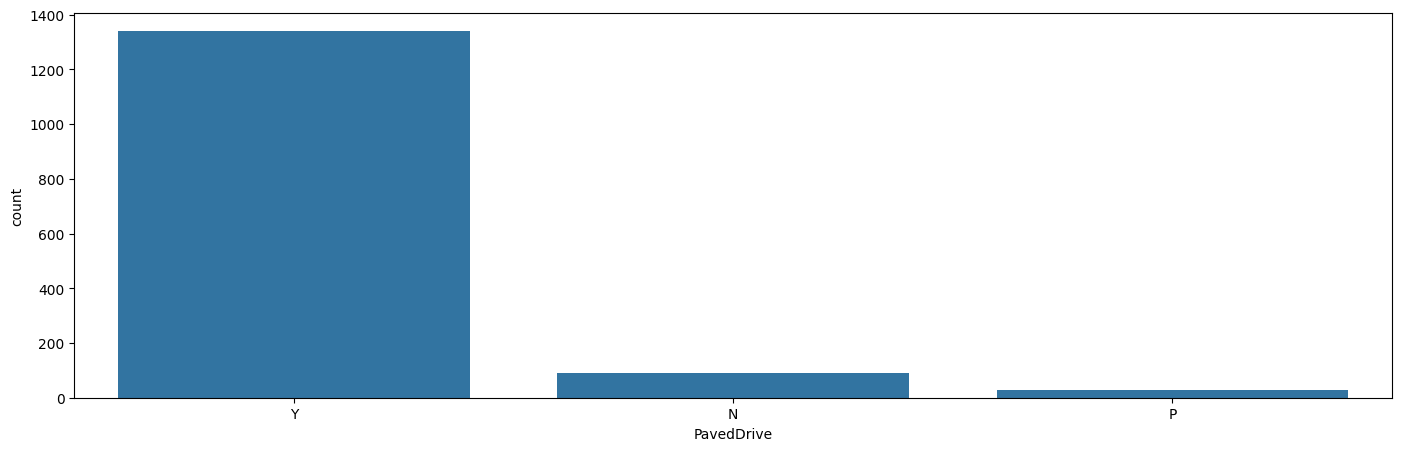

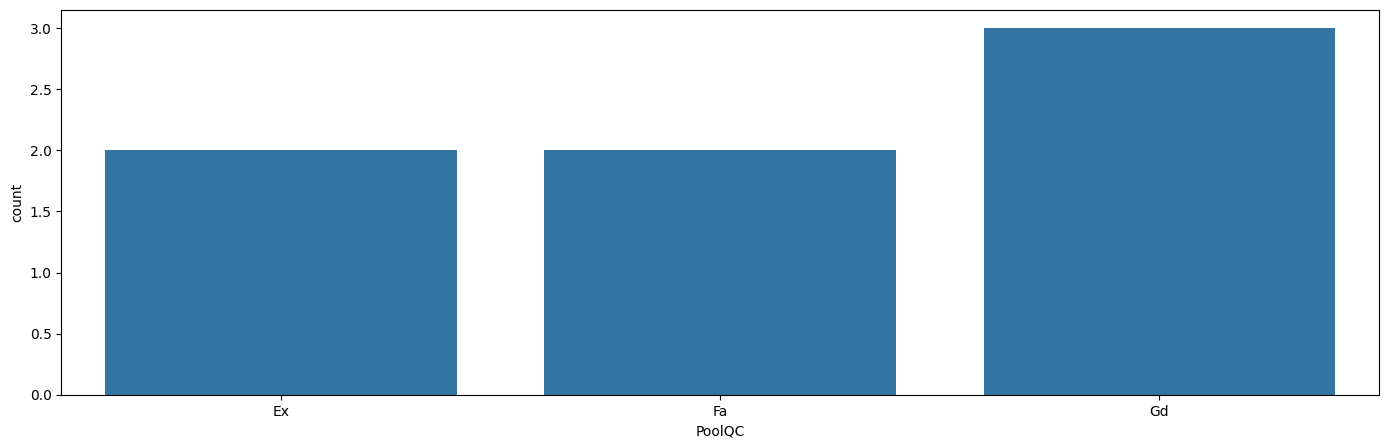

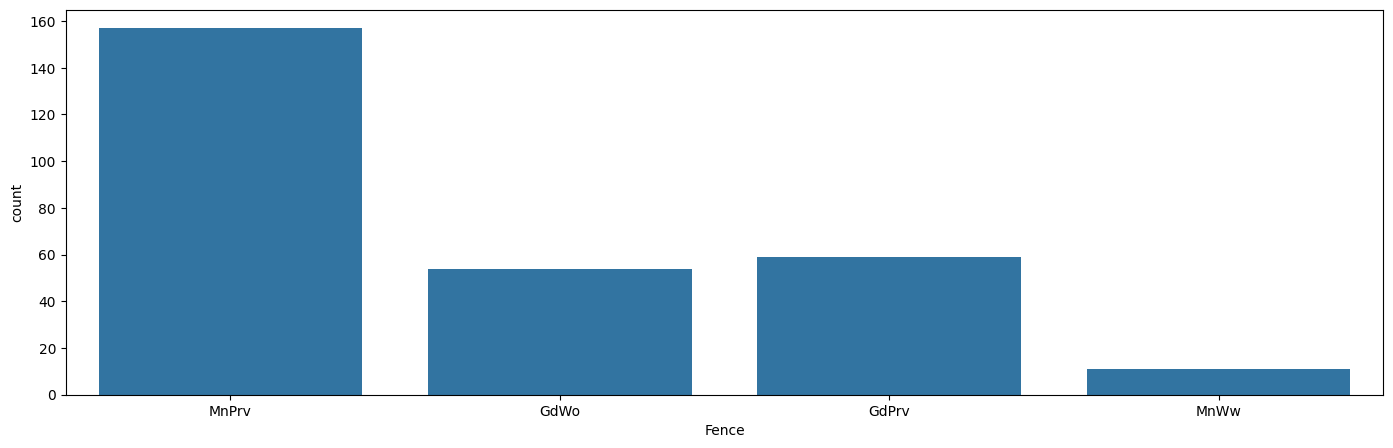

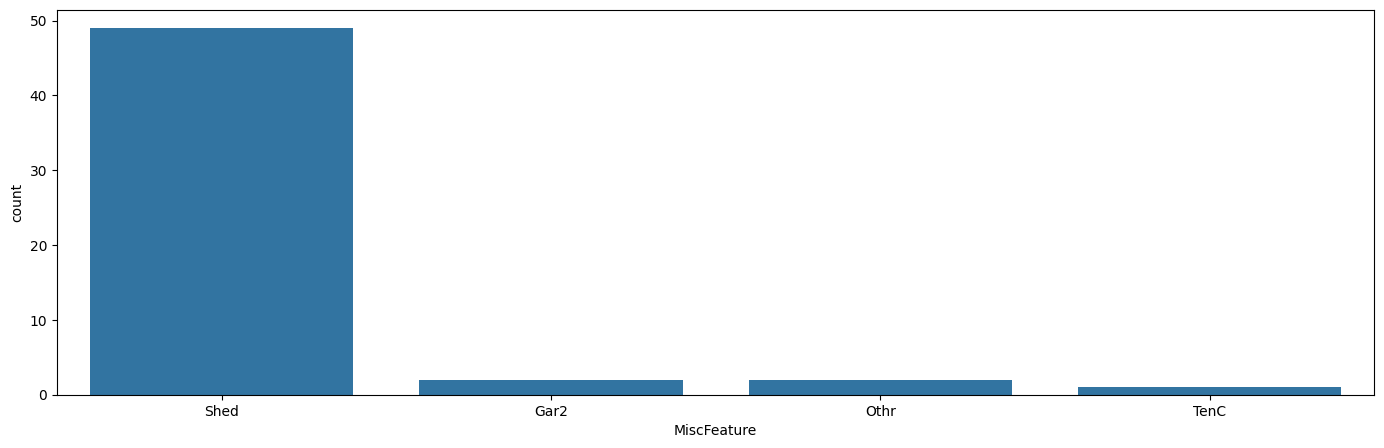

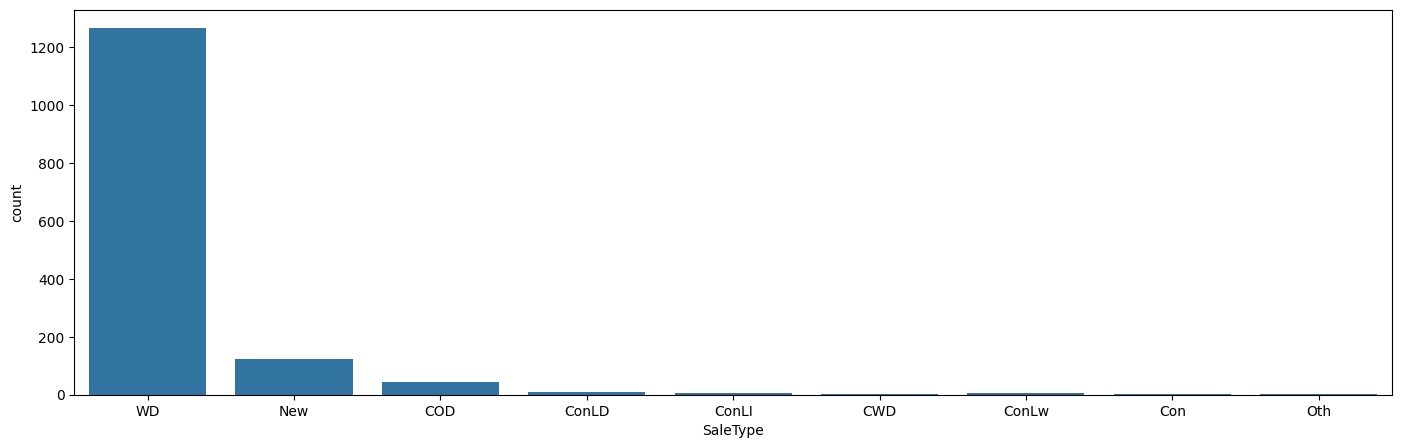

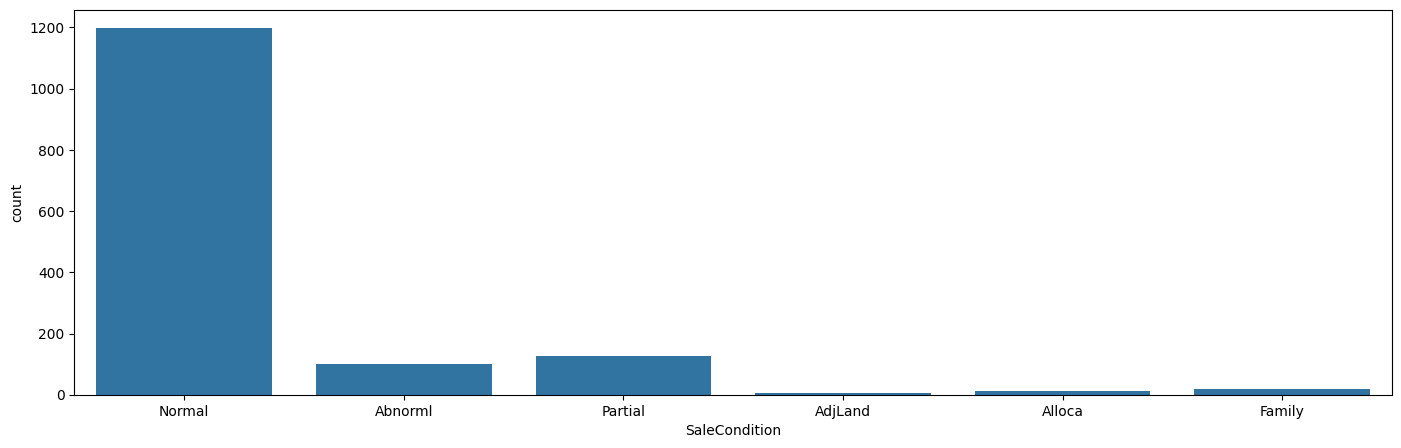

In [31]:
for column in df_objs:
        plt.figure(figsize=(17,5))
        sns.countplot(data=df_objs,x=column)


/tmp/ipykernel_9654/1230275992.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,5))


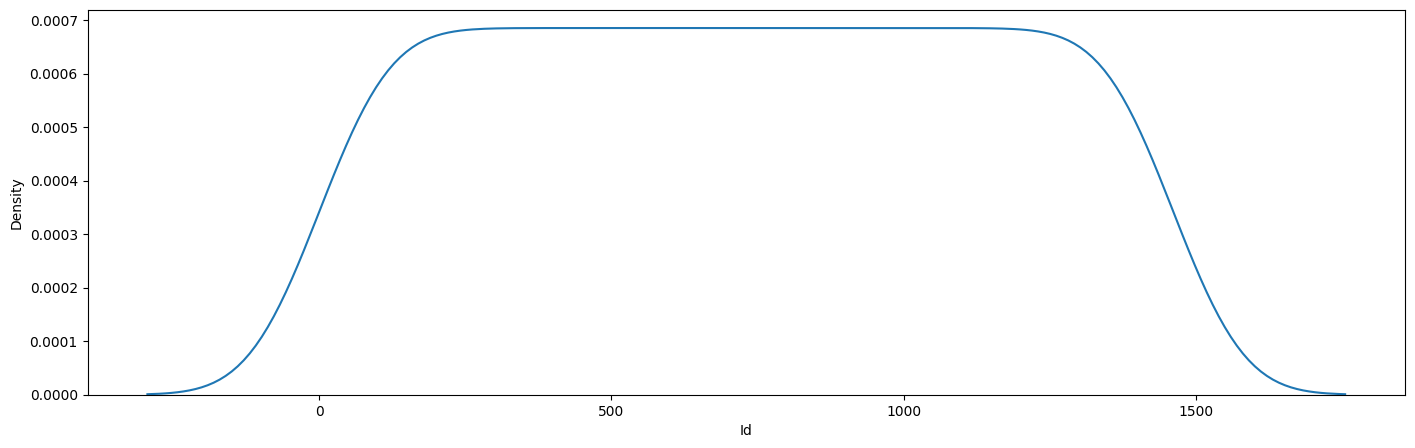

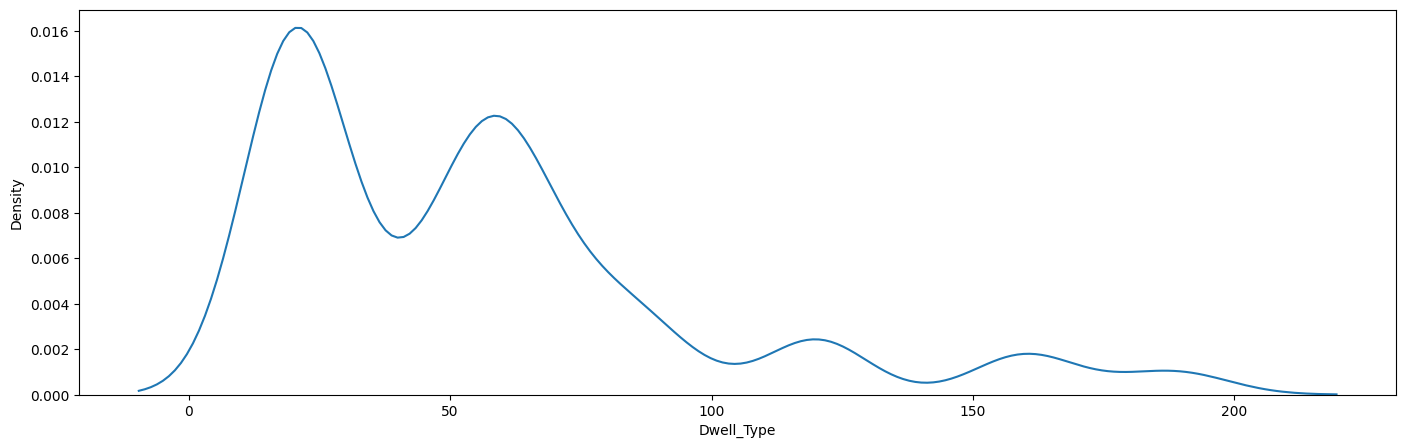

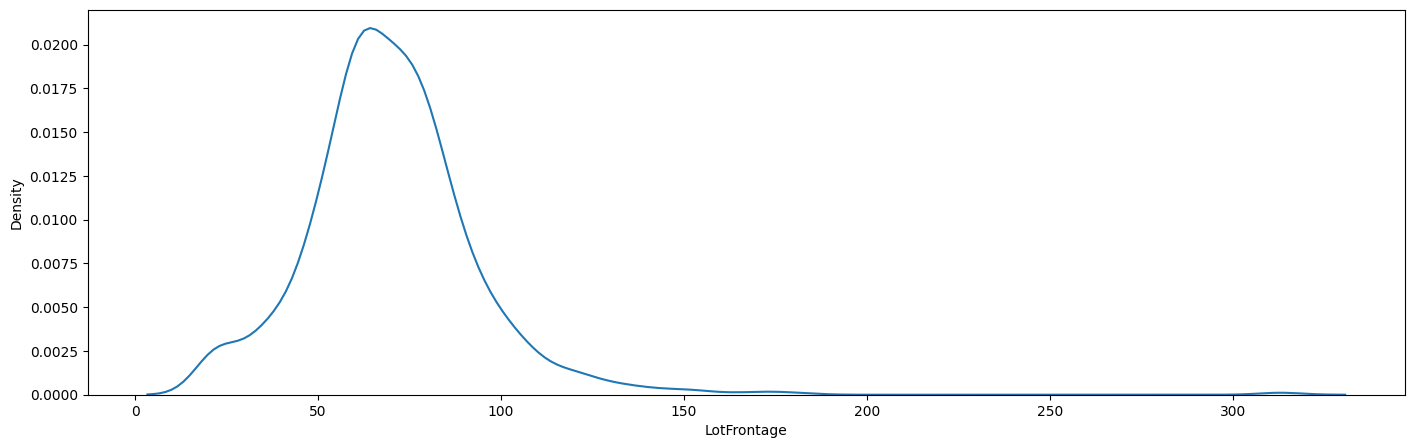

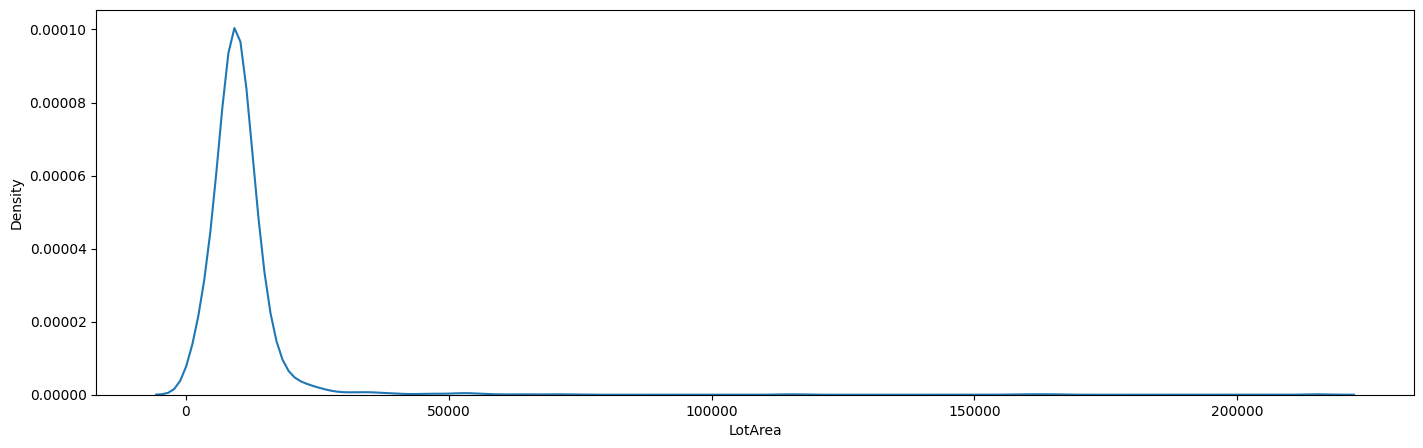

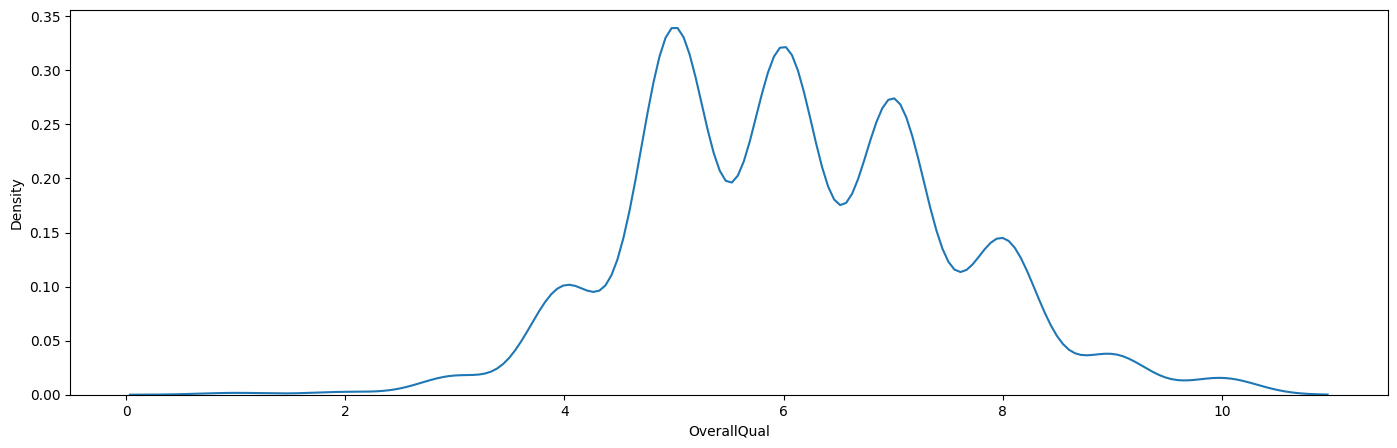

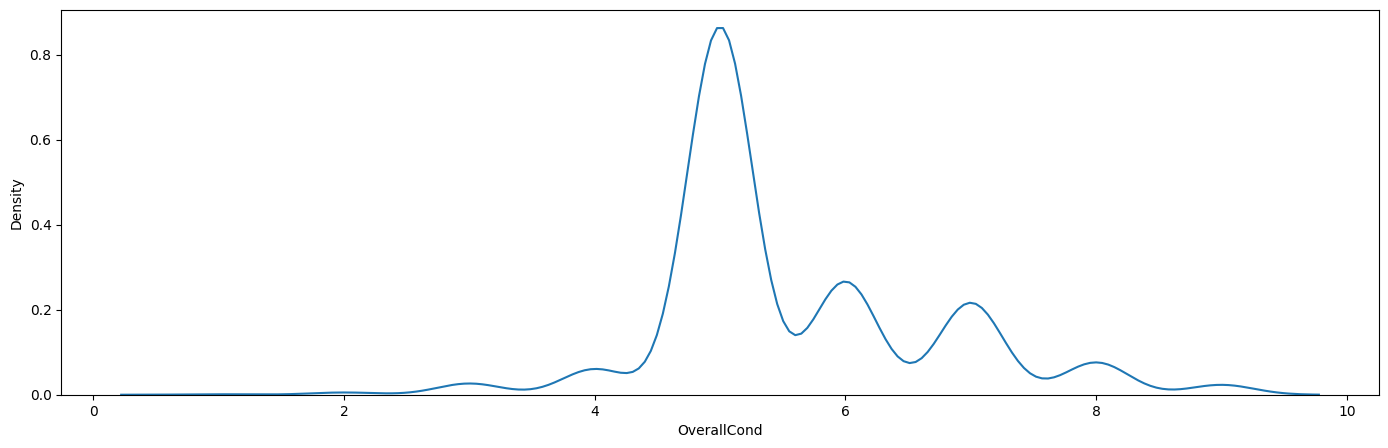

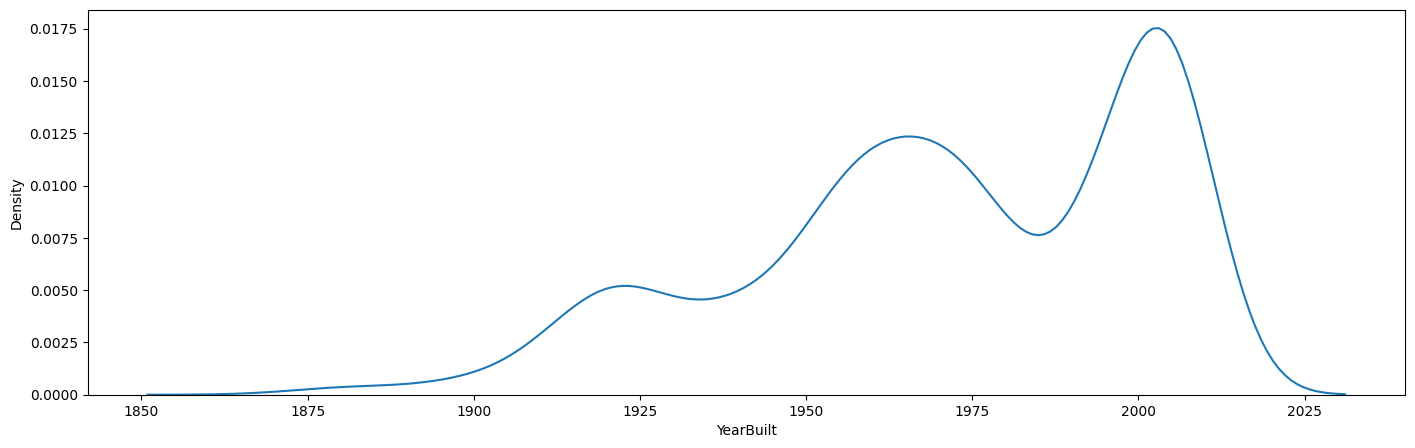

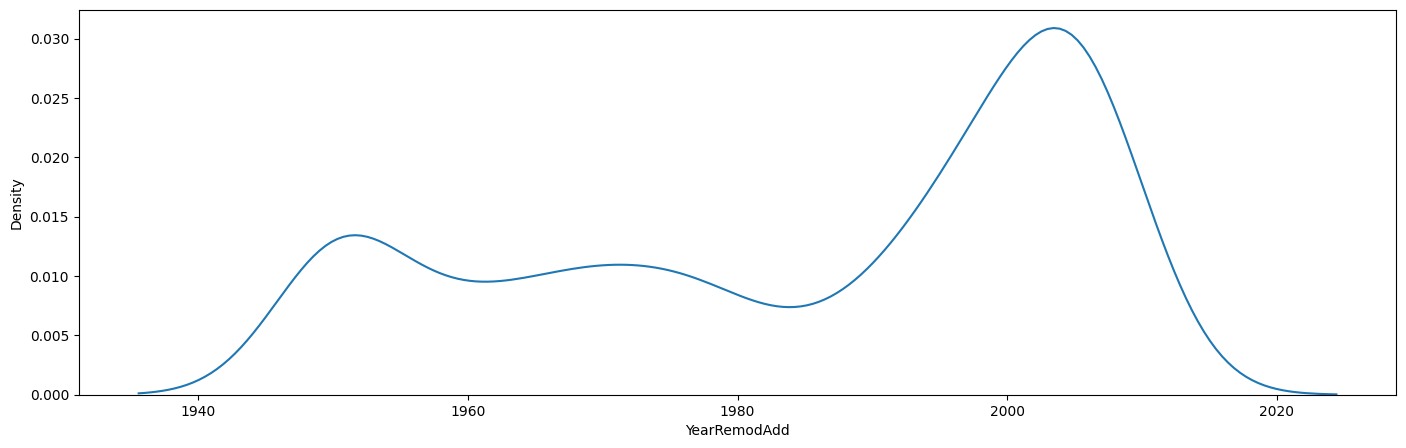

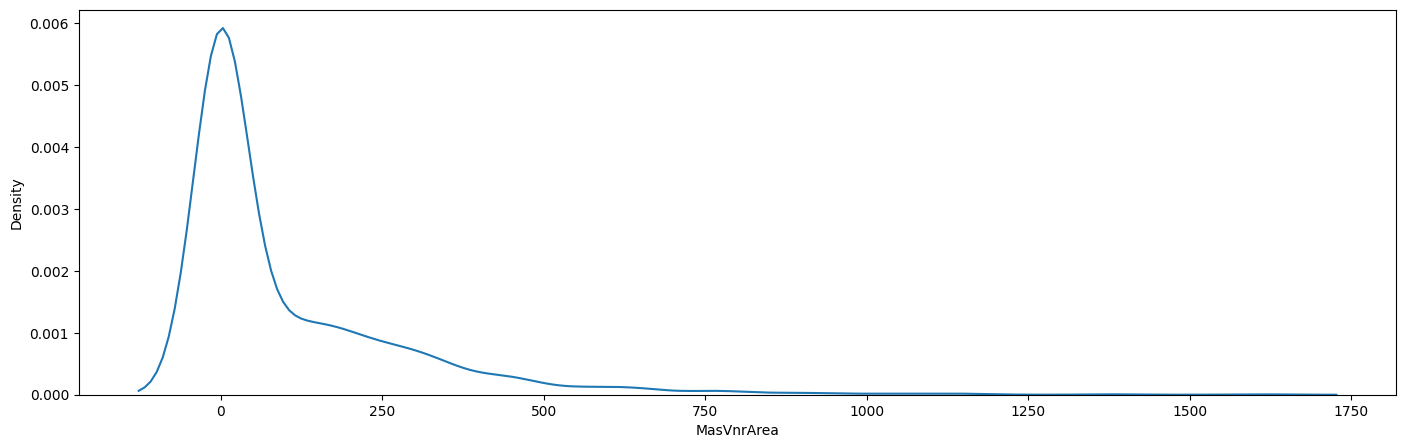

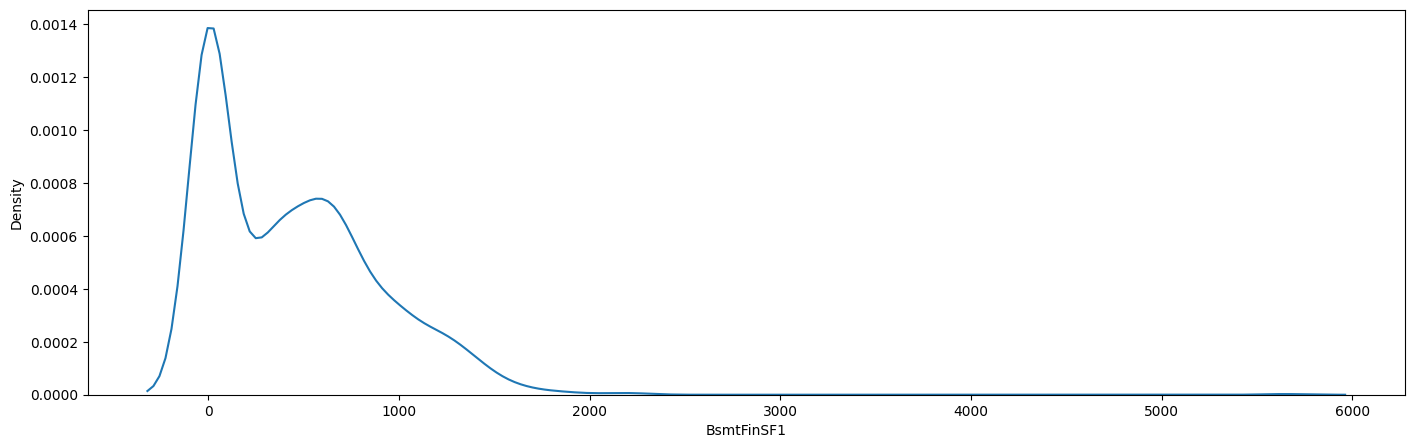

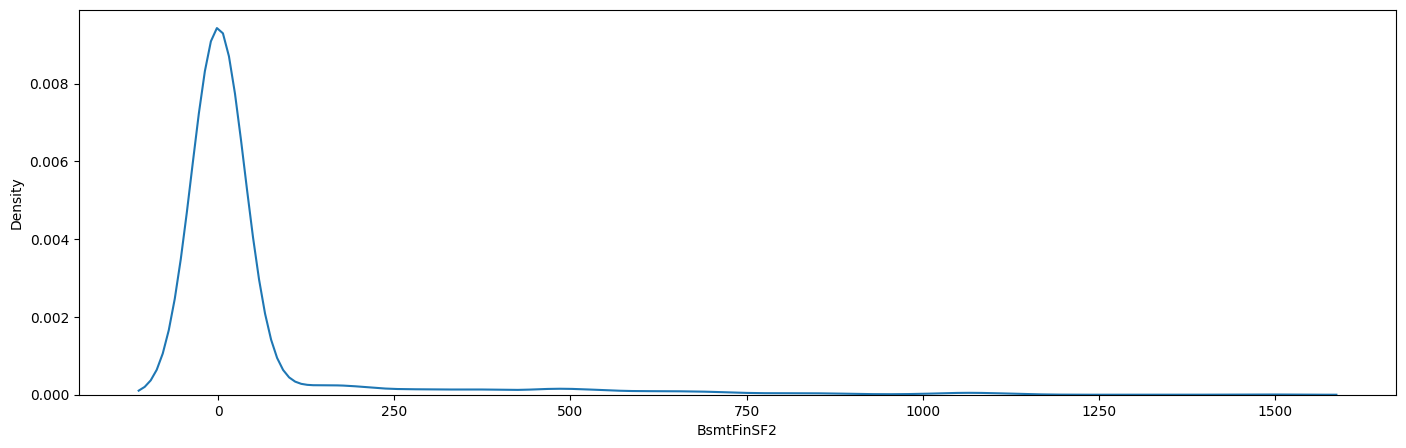

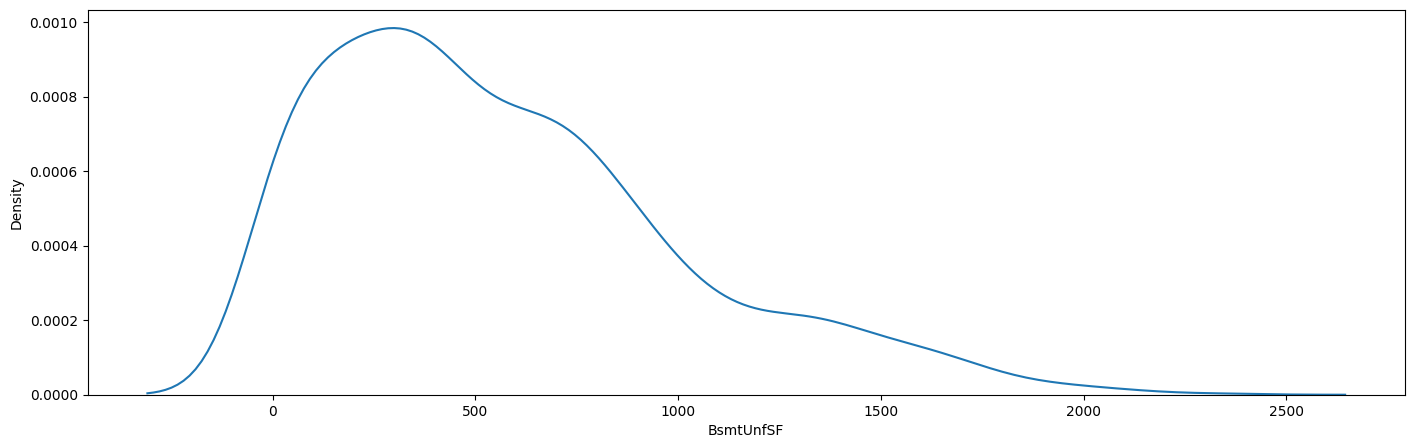

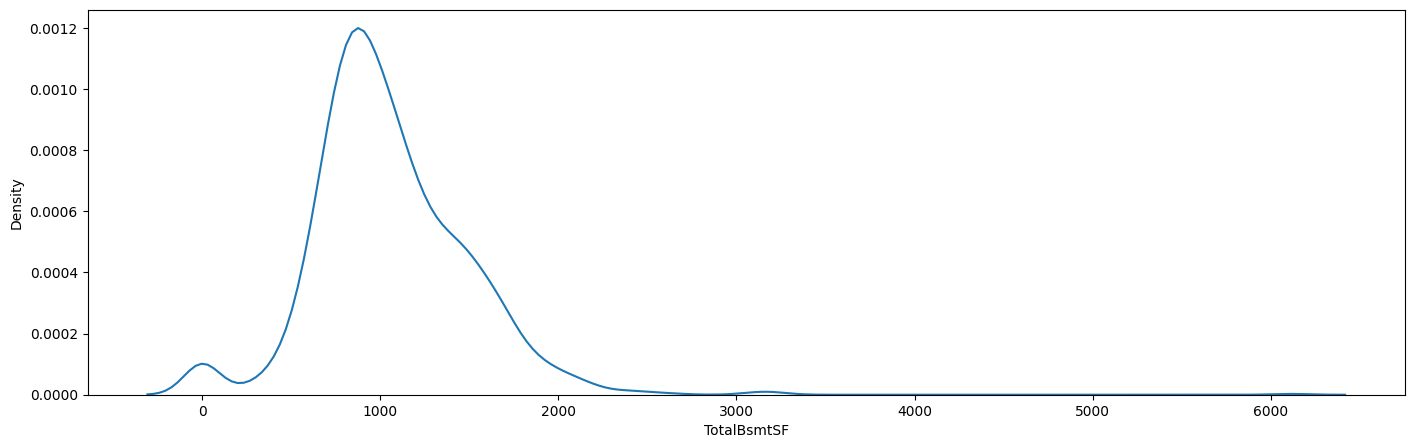

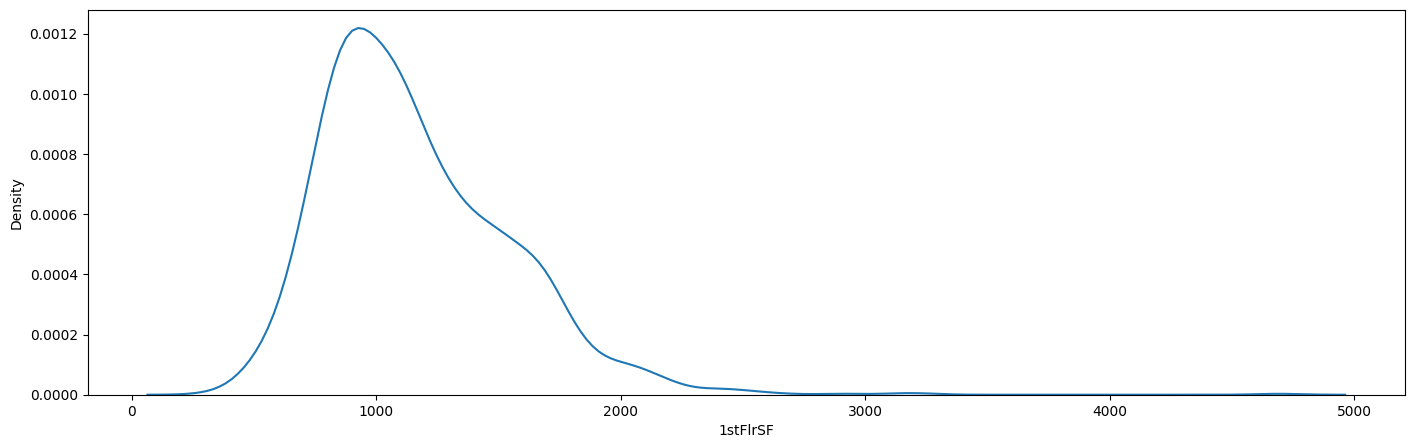

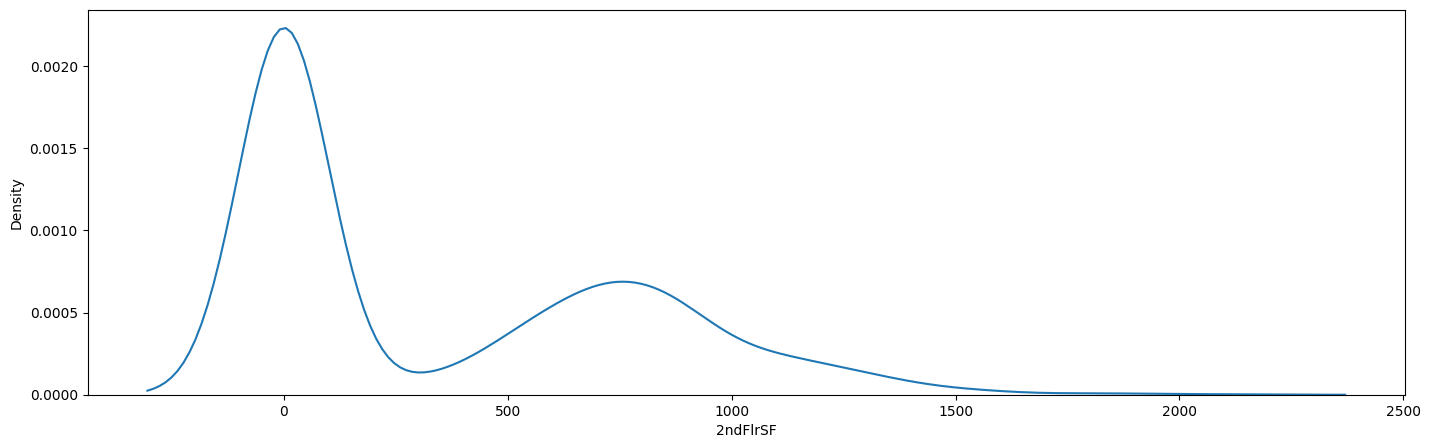

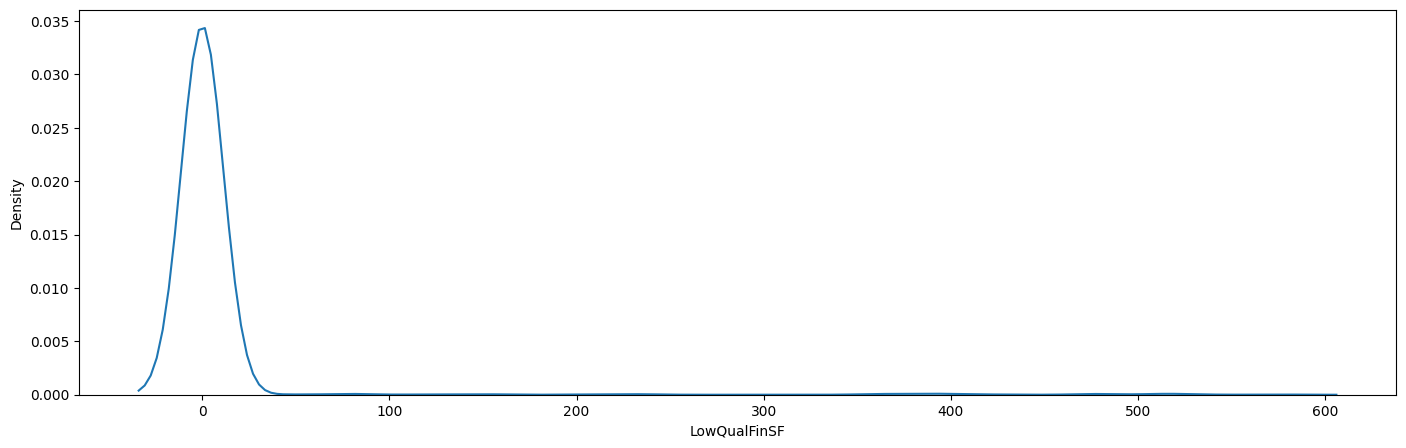

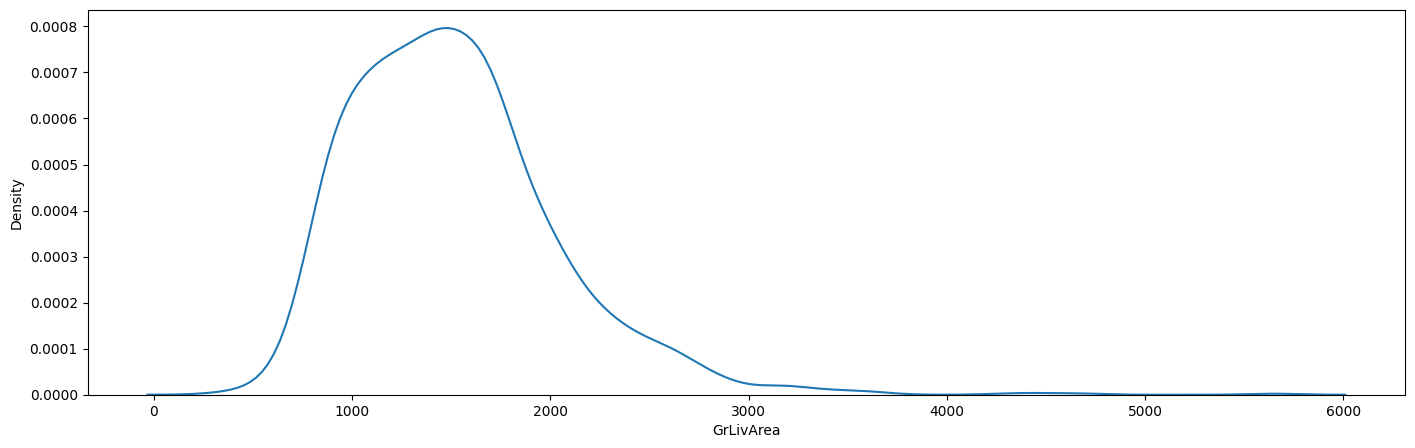

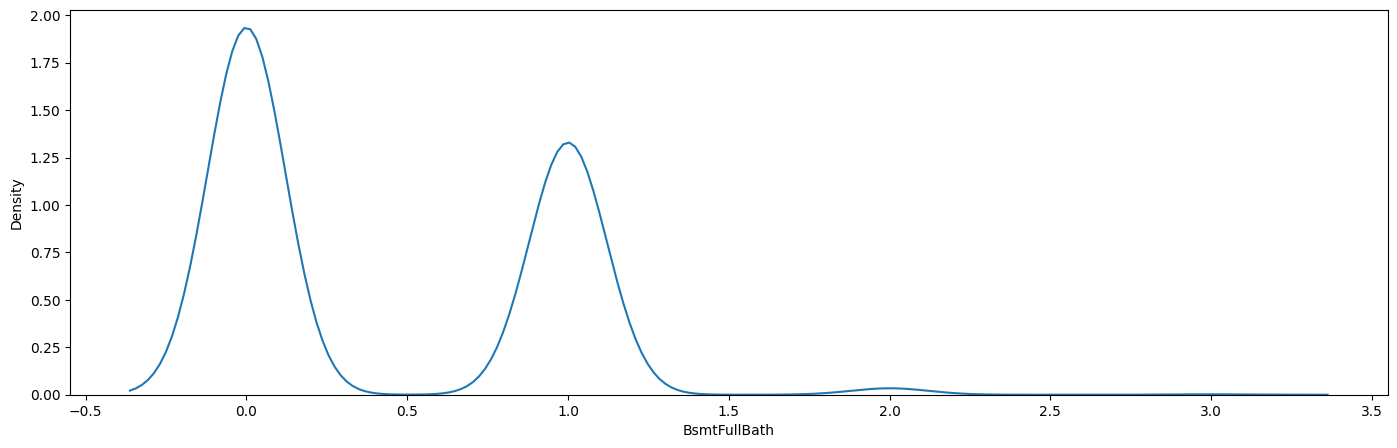

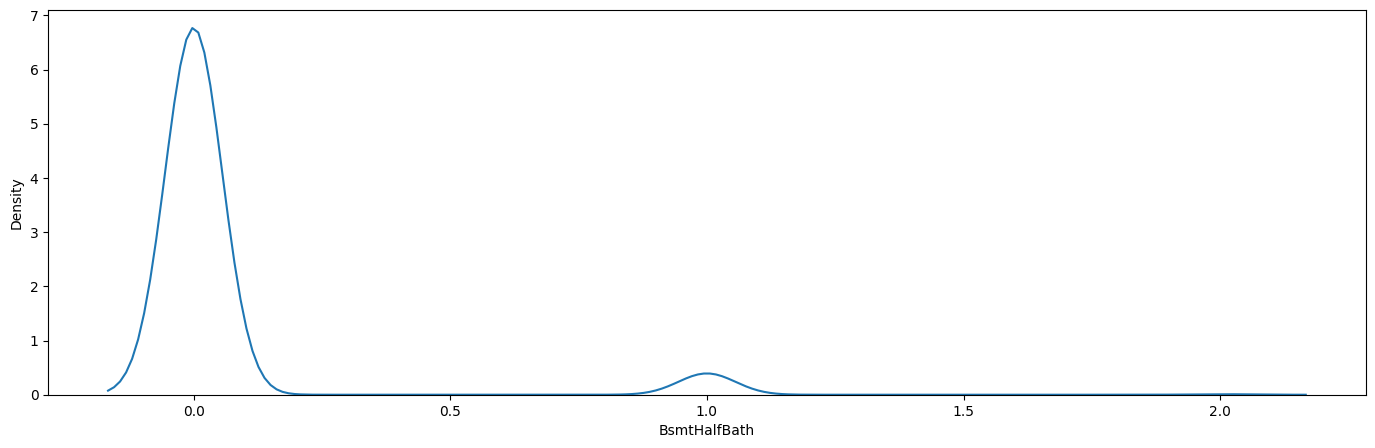

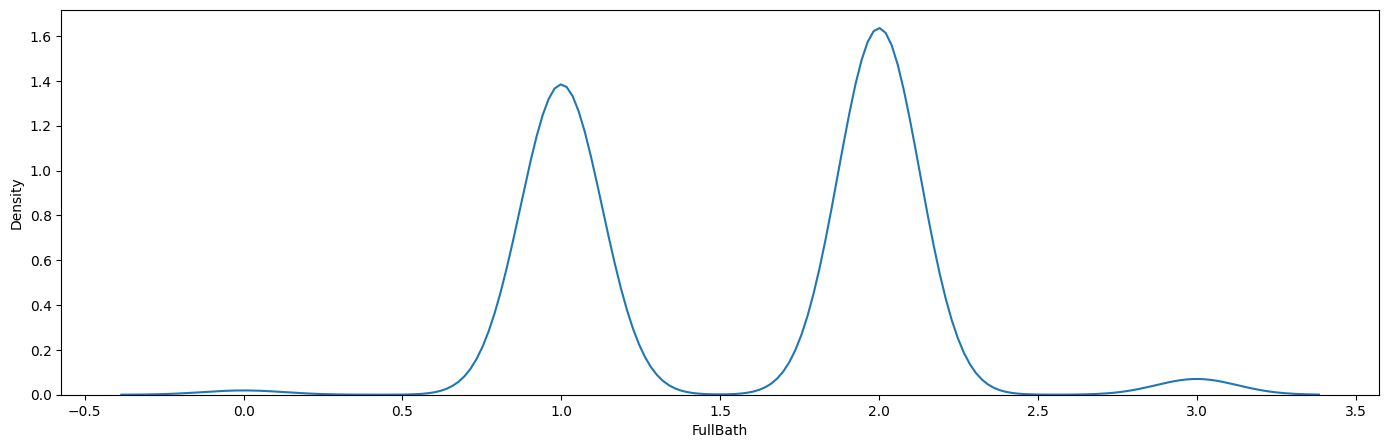

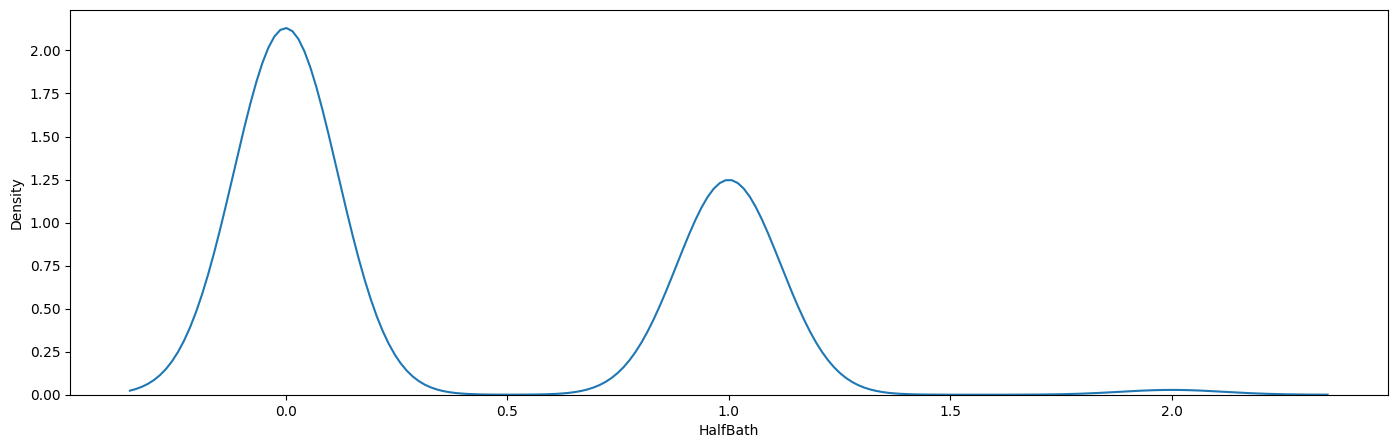

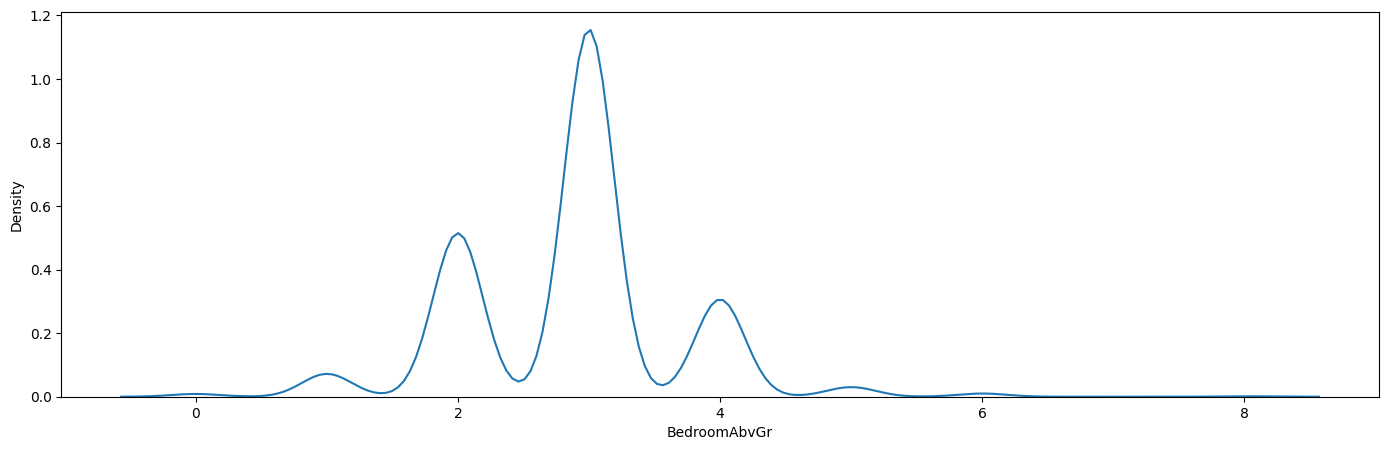

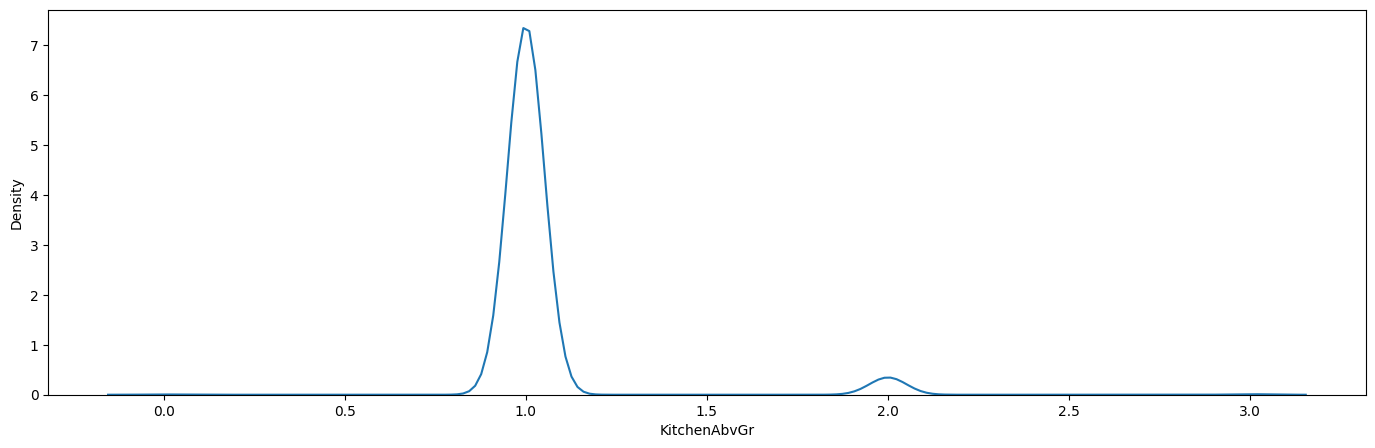

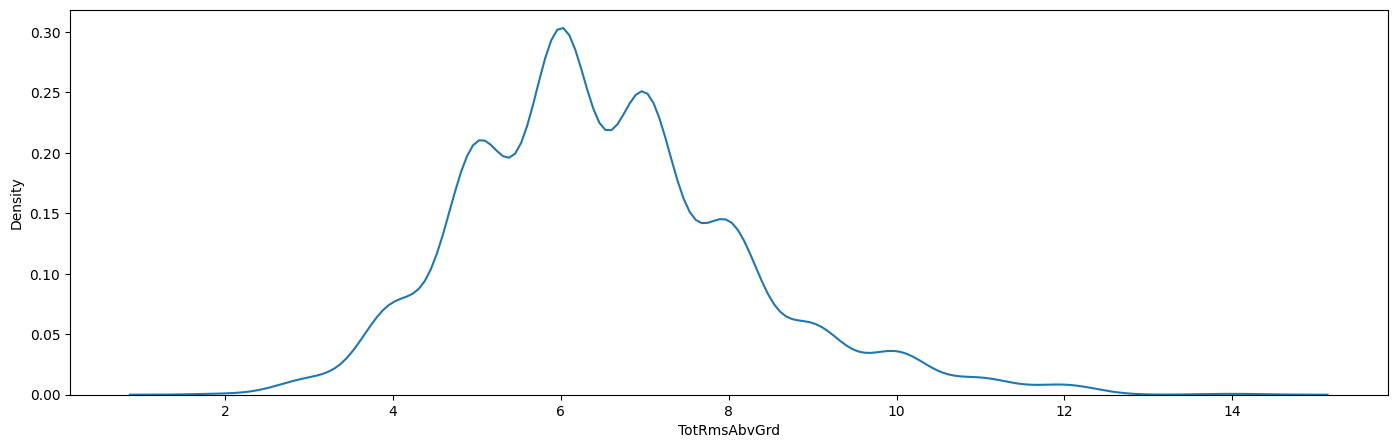

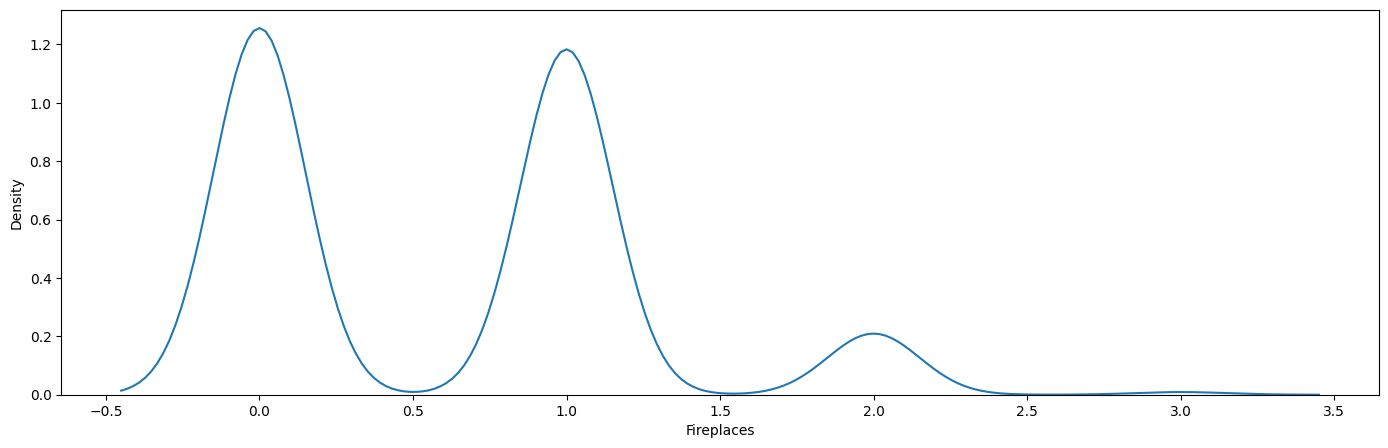

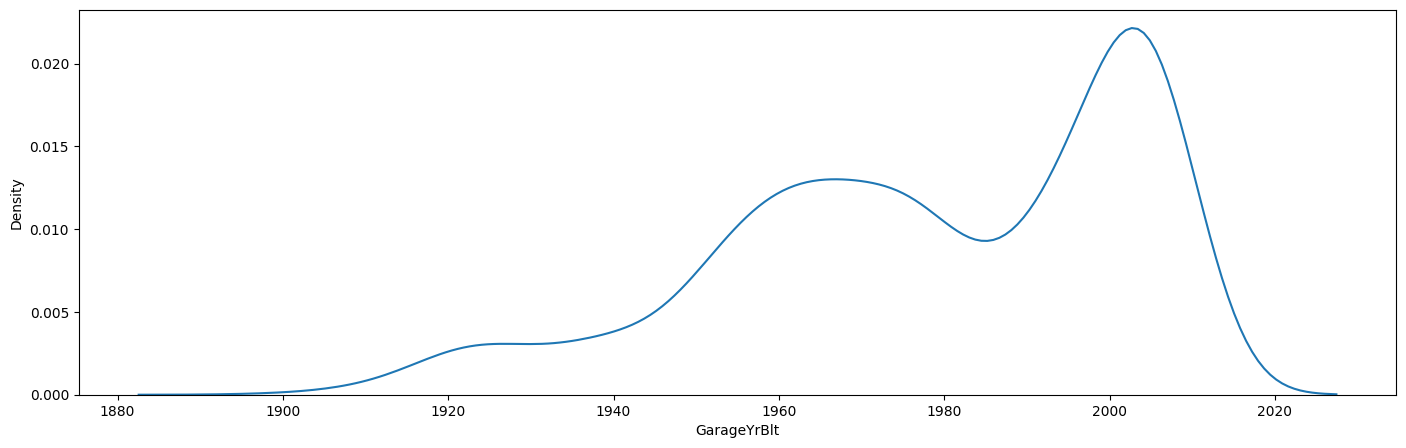

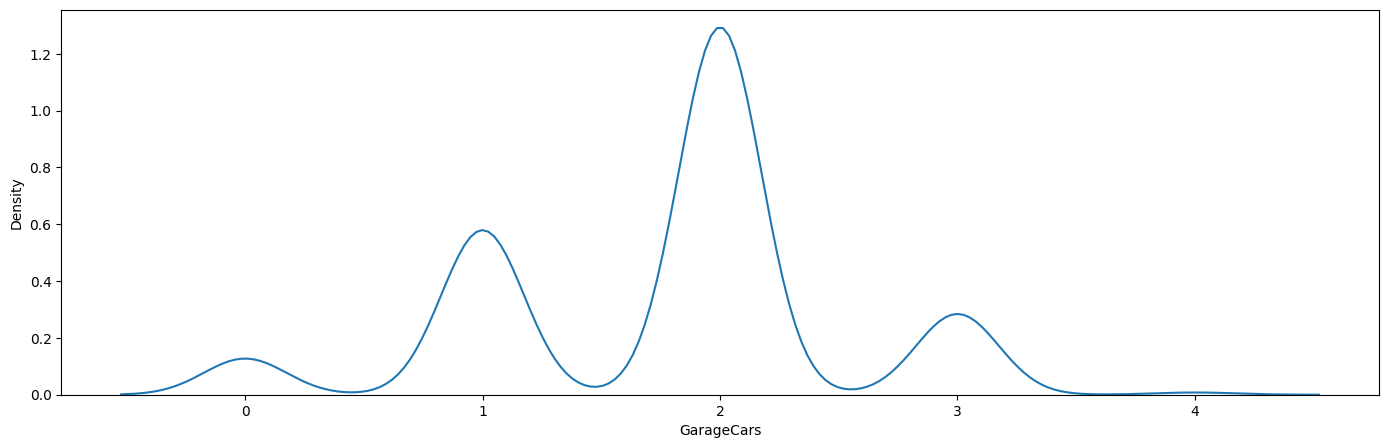

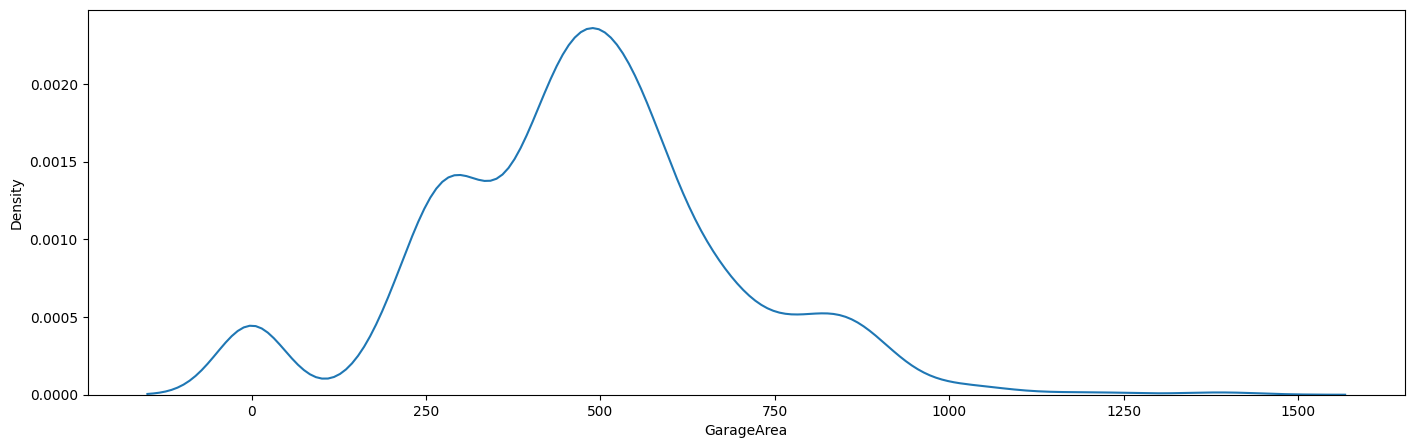

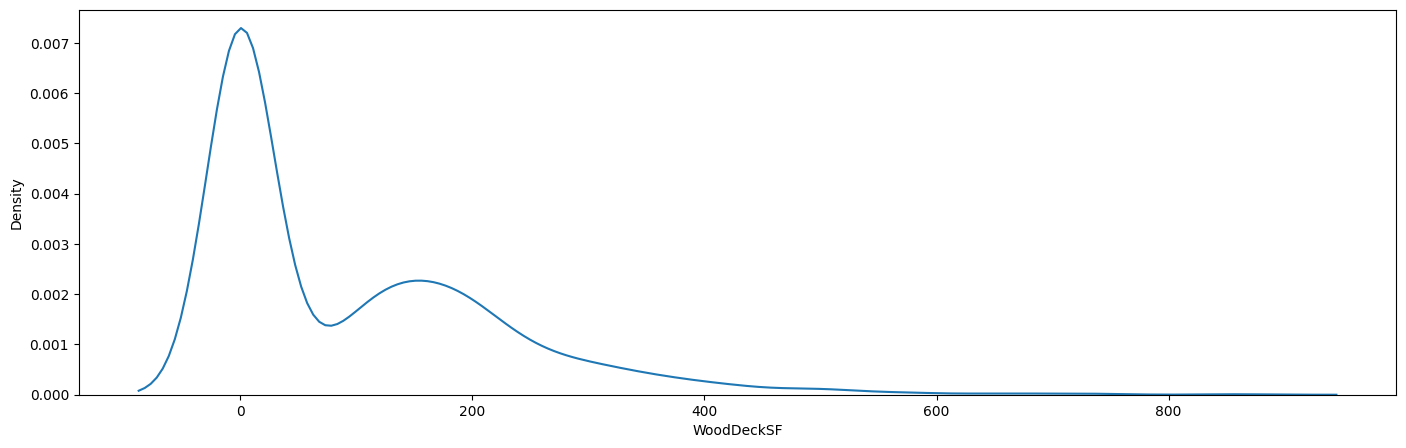

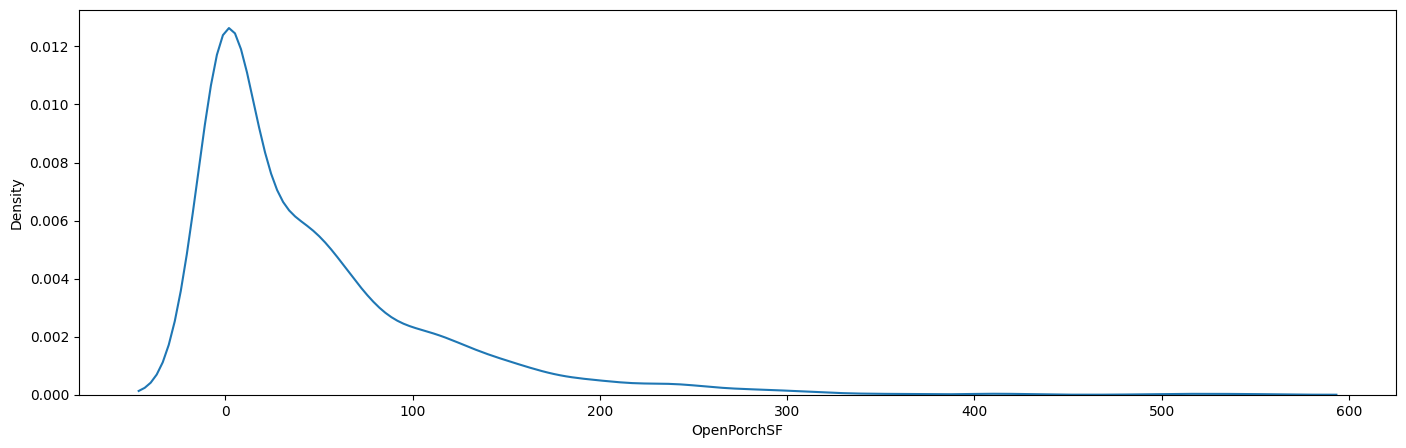

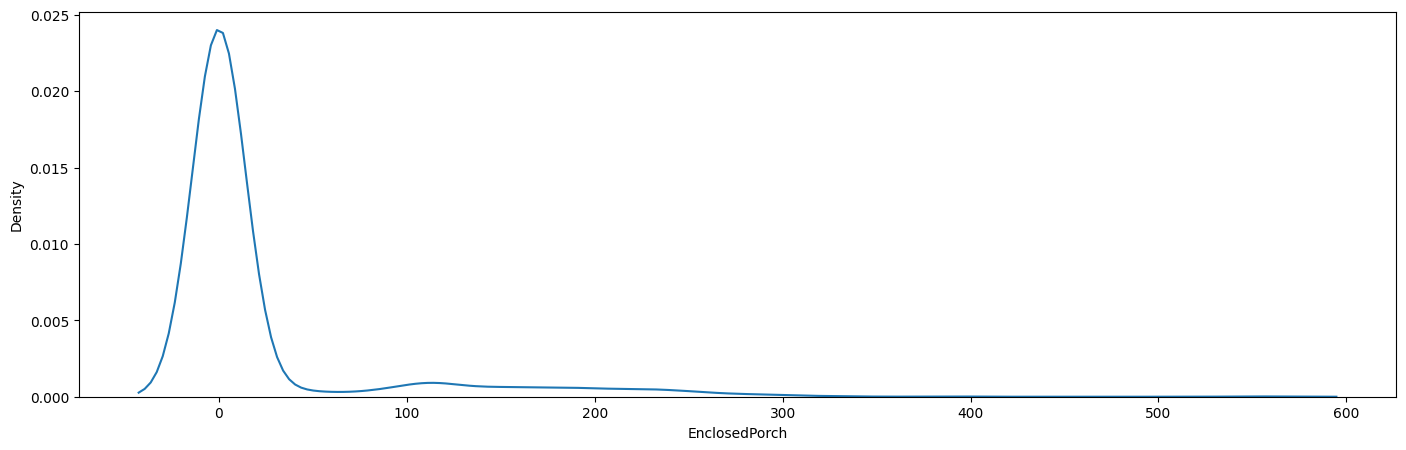

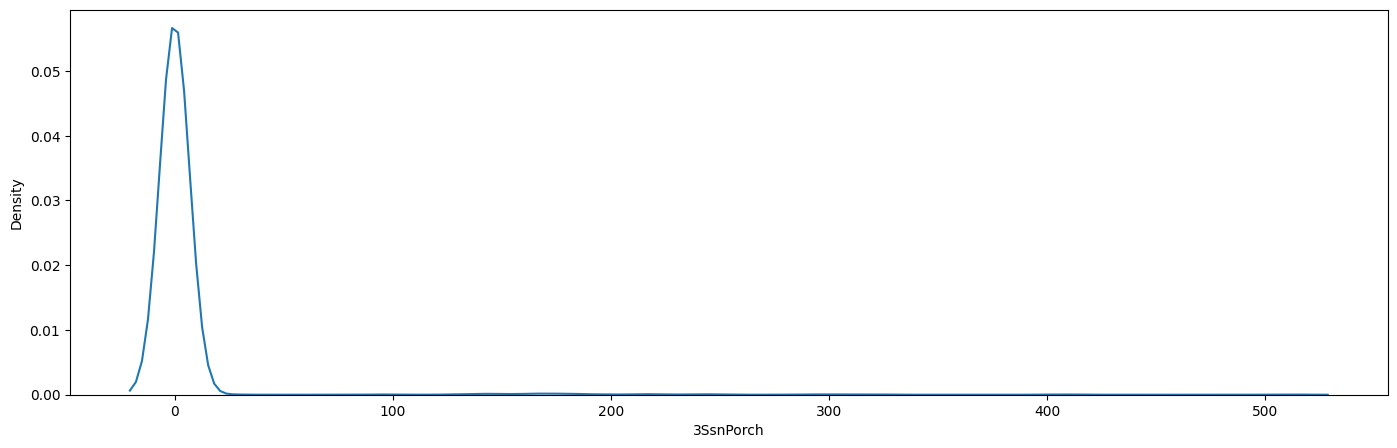

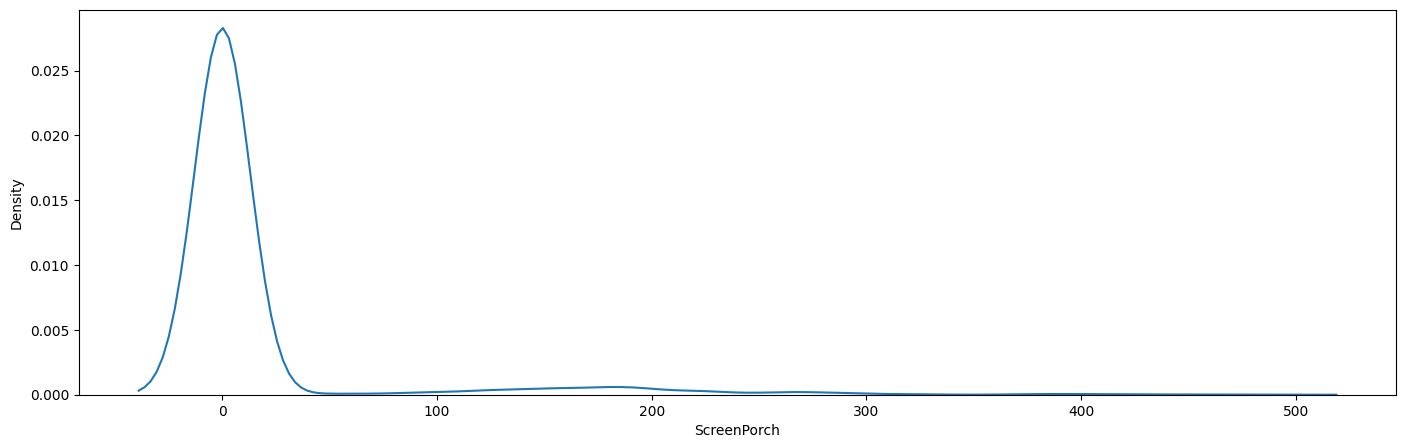

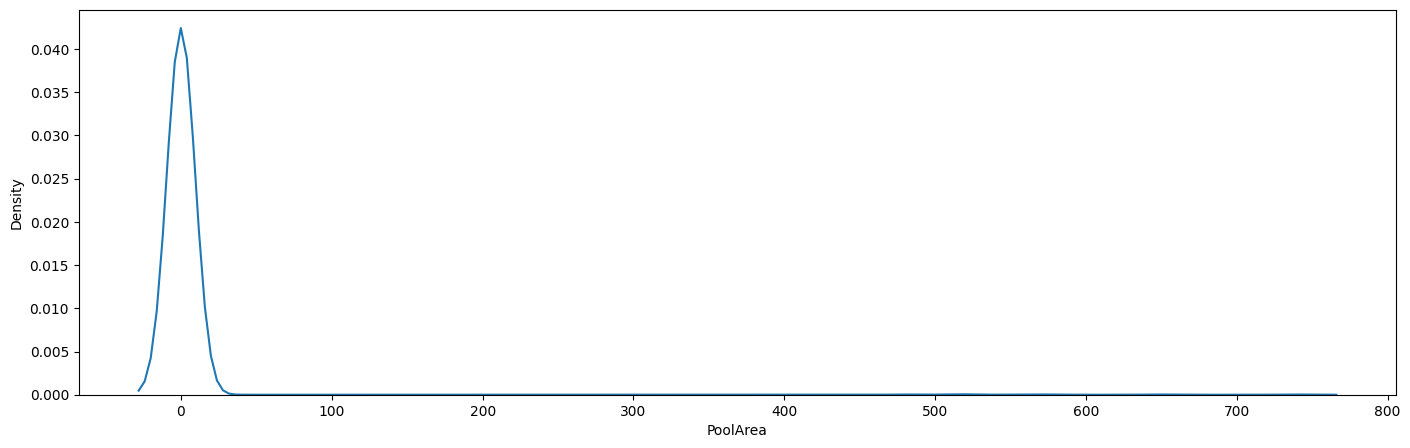

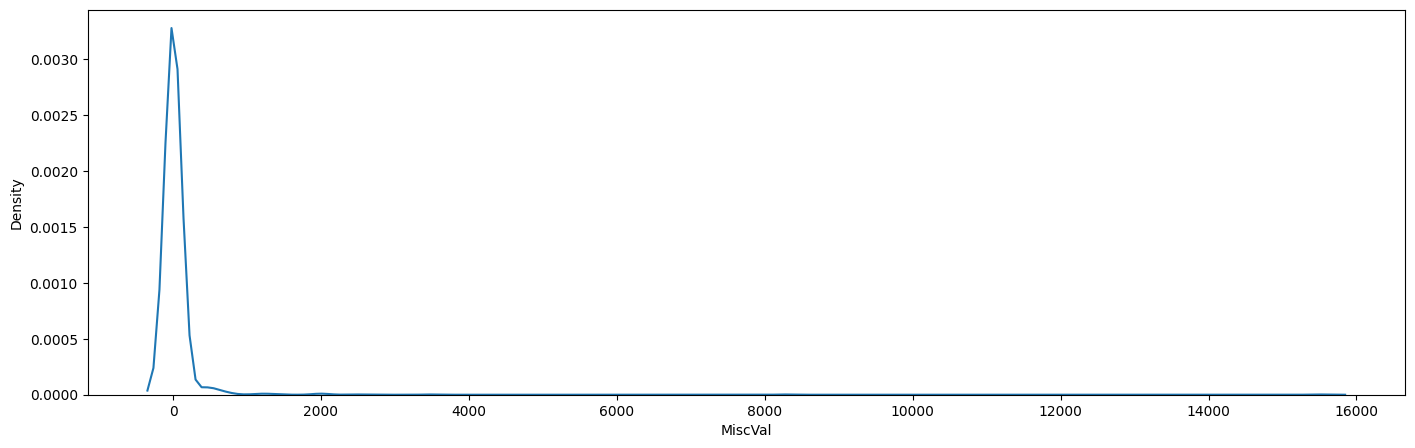

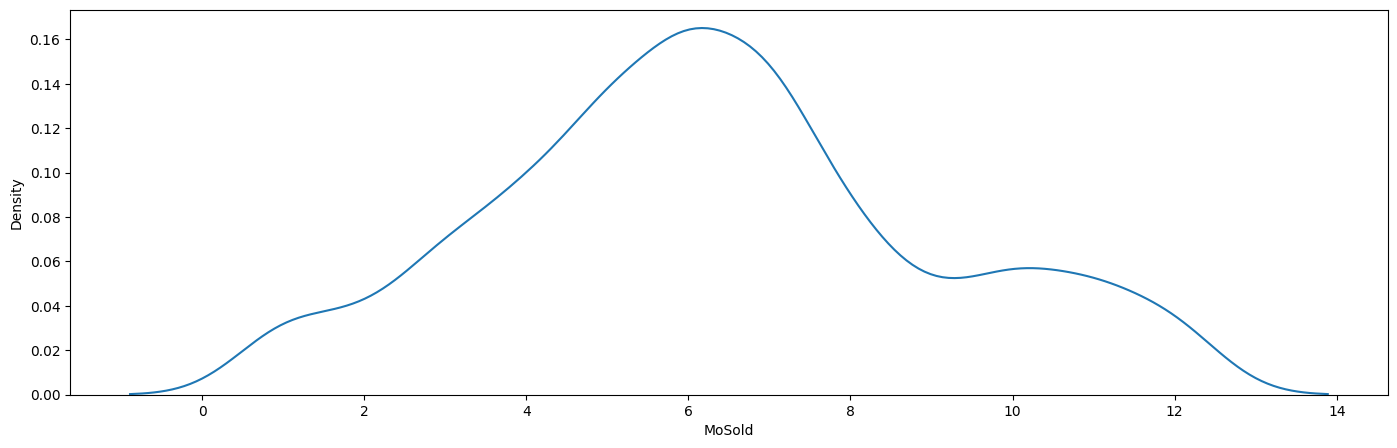

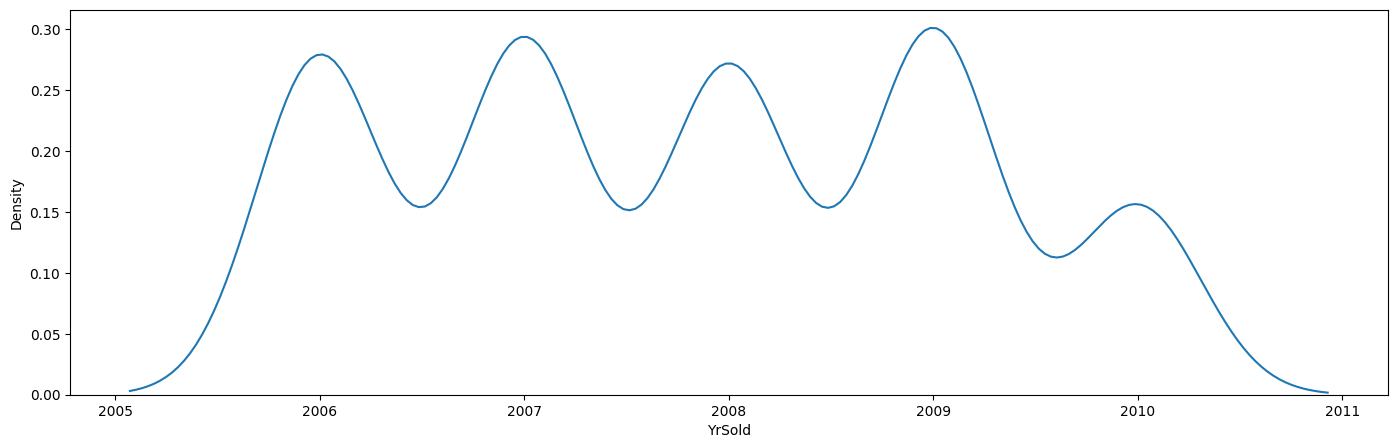

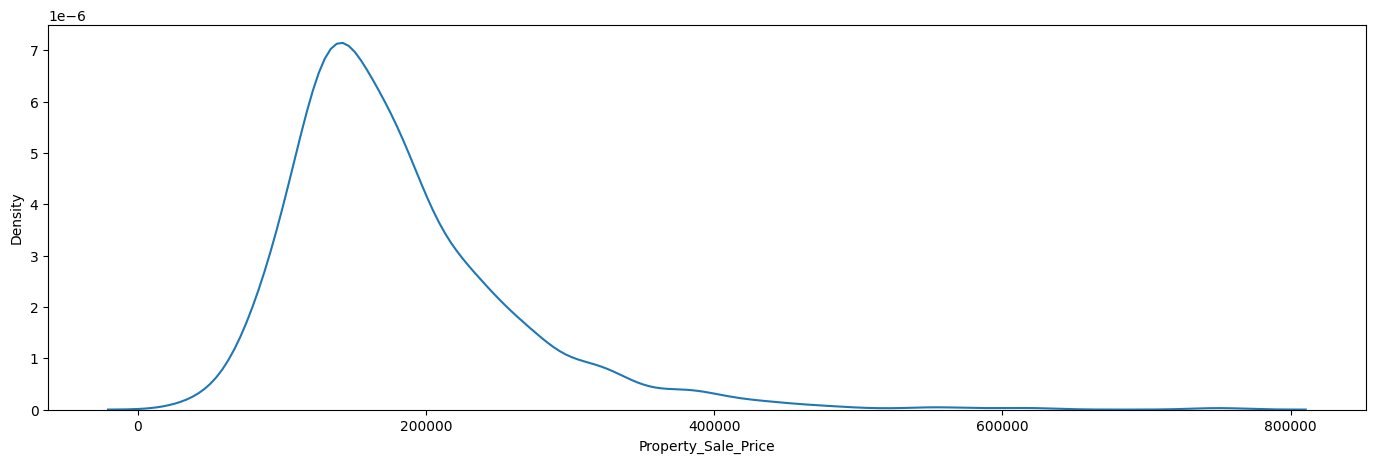

In [32]:
for column in df_nums:
        plt.figure(figsize=(17,5))
        sns.kdeplot(df_nums[column])
    

<Axes: >

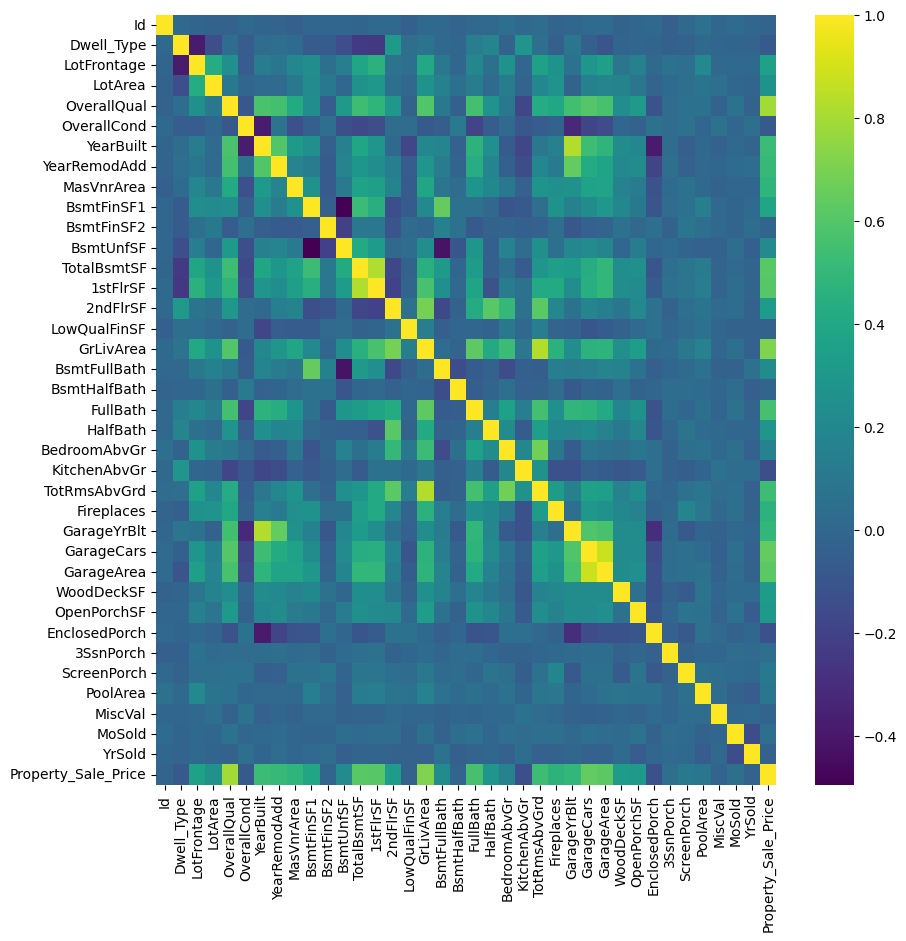

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
sns.heatmap(df_nums.corr(), cmap="viridis" , ax=ax)

In [39]:
i=0
for column in df_objs:
    print(df.groupby(column).agg({'Property_Sale_Price': ['mean']}))
    sns.countplot(data=df,x=column)
    i+=1
    ifi
    

           Property_Sale_Price
                          mean
Zone_Class                    
C (all)           74528.000000
FV               214014.061538
RH               131558.375000
RL               191004.994787
RM               126316.830275
          Property_Sale_Price
                         mean
Road_Type                    
Grvl            130190.500000
Pave            181130.538514
      Property_Sale_Price
                     mean
Alley                    
Grvl        122219.080000
Pave        168000.585366
               Property_Sale_Price
                              mean
Property_Shape                    
IR1                  206101.665289
IR2                  239833.365854
IR3                  216036.500000
Reg                  164754.818378
            Property_Sale_Price
                           mean
LandContour                    
Bnk               143104.079365
HLS               231533.940000
Low               203661.111111
Lvl               180183.746758
   

----